In [1]:
import cloudmetrics
import numpy as np
import wradlib as wrl
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib as mpl
import glob
import cv2
import os
import matplotlib.colors as mcolors
import math
import seaborn as sns
import re

In [6]:
arr = np.array([[0,1,1,0],
      [0,1,1,0],
      [0,1,1,0]])
print(type(arr))
print(cloudmetrics.mask.cloud_fraction(mask=arr))

<class 'numpy.ndarray'>
0.5


In [82]:
#for cartesian coordinates
def cartesianIdToCartesianCoor(gridIdIn):
    
    coordinates = np.empty(3, dtype=int) 
    
    timestep = 0
    while (gridIdIn-(1501*1501)) >= 0:
        timestep += 1
        gridIdIn -= (1501*1501)
    coordinates[0] = timestep
    
    x = 0
    while gridIdIn - 1501 >= 0:
        x += 1
        gridIdIn -= 1501
    coordinates[1] = x
    
    y = gridIdIn
    coordinates[2] = y
    return coordinates

def readInTxtFile(path):
    print("Read in text für Plotting routine")
    dataFromTxt = np.loadtxt(path, dtype=int)
    dataArray = np.full((288, 1501, 1501), 0)
    print("dim array zero: " + str(dataArray.ndim))
    i = 0
    maxI = dataFromTxt.size
    firstTimestamp = 0
    lastTimestamp = 0
    print("size of txtFile " + str(maxI))
    while i < maxI:
        if(i%100000 == 0):
            print(i)
        polarCoor = cartesianIdToCartesianCoor(dataFromTxt[i])
        #print("t: " + str(polarCoor[0]) + " a: " + str(polarCoor[1]) + " r: " + str(polarCoor[2]))
        dataArray[polarCoor[0]][polarCoor[1]][polarCoor[2]] = 1
        if i == 0:
            print("FST")
            firstTimestamp = polarCoor[0]
        i += 2
        if i >= maxI:
            print("LST")
            lastTimestamp = polarCoor[0]
    #dataArray = data.astype('float32')
    print("dim array first: " + str(dataArray.ndim))
    print("first timestamp: " + str(firstTimestamp))
    print("last timestamp: " + str(lastTimestamp))
    return dataArray#, firstTimestamp, lastTimestamp

In [32]:
arr = cartesianIdToCartesianCoor(38042118)
print(arr[0])
print(arr[1])
print(arr[2])

16
1328
774


In [81]:
dt = np.array([[0,0,0,1,0],
               [0,0,0,0,0],
               [1,0,1,1,0]])
print(type(dt))
print(type(dataArray))
print(cloudmetrics.objects.metrics.num_objects(cloudmetrics.objects.label(dt)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3


In [73]:
dataArray, firstTimestamp, lastTimestamp = readInTxtFile(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\calculateDistance\20170603._component9_dbz25Interpol_1000.txt")

for i in range(lastTimestamp-firstTimestamp+3):
    print("eintritt Schleife i: " + str(i))
    print(cloudmetrics.mask.objects.num_objects(dataArray[firstTimestamp+i],periodic_domain=True))



Read in text für Plotting routine
dim array zero: 3
size of txtFile 126306
0
FST
100000
LST
dim array first: 3
first timestamp: 102
last timestamp: 131
eintritt Schleife i: 0
1
eintritt Schleife i: 1
2
eintritt Schleife i: 2
6
eintritt Schleife i: 3
1
eintritt Schleife i: 4
7
eintritt Schleife i: 5
3
eintritt Schleife i: 6
5
eintritt Schleife i: 7
2
eintritt Schleife i: 8
3
eintritt Schleife i: 9
1
eintritt Schleife i: 10
4
eintritt Schleife i: 11
4
eintritt Schleife i: 12
3
eintritt Schleife i: 13
4
eintritt Schleife i: 14
2
eintritt Schleife i: 15
2
eintritt Schleife i: 16
5
eintritt Schleife i: 17
15
eintritt Schleife i: 18
12
eintritt Schleife i: 19
7
eintritt Schleife i: 20
4
eintritt Schleife i: 21
8
eintritt Schleife i: 22
25
eintritt Schleife i: 23
10
eintritt Schleife i: 24
21
eintritt Schleife i: 25
21
eintritt Schleife i: 26
35
eintritt Schleife i: 27
25
eintritt Schleife i: 28
10
eintritt Schleife i: 29
8
eintritt Schleife i: 30
0
eintritt Schleife i: 31
0


In [85]:
#help(cloudmetrics.mask.objects)
help(cloudmetrics.scalar)

Help on package cloudmetrics.scalar in cloudmetrics:

NAME
    cloudmetrics.scalar

PACKAGE CONTENTS
    spectral
    stats
    woi

FILE
    c:\users\jonathan langer\appdata\roaming\python\python39\site-packages\cloudmetrics\scalar\__init__.py




In [3]:
def plotOne(path):
    dataFromTxt = np.loadtxt(path, dtype=int)
    i = 0
    maxI = dataFromTxt.size
    dataArray = np.full((maxI), 0)
    while i < maxI:
        dataArray[i] = dataFromTxt[i]
        i += 1

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (32,8))
    X = []
    Y = []
    for x in range(dataArray.size):
        X.append(x+2)
        Y.append(dataArray[x])
    df = pd.DataFrame({'X': X,'Y': Y})
    # use the seaborn hue statement to differentiate the different species
    sns.scatterplot(ax=ax, x="X", y="Y", data = df,s=100)
    #plt.ylim(0, 1501)
    #plt.xlim(0, 1501)
    ax.set_xlabel("k")
    ax.set_ylabel("kosten")
    #ax[clusterNr].legend(fontsize=12)

    plt.show()

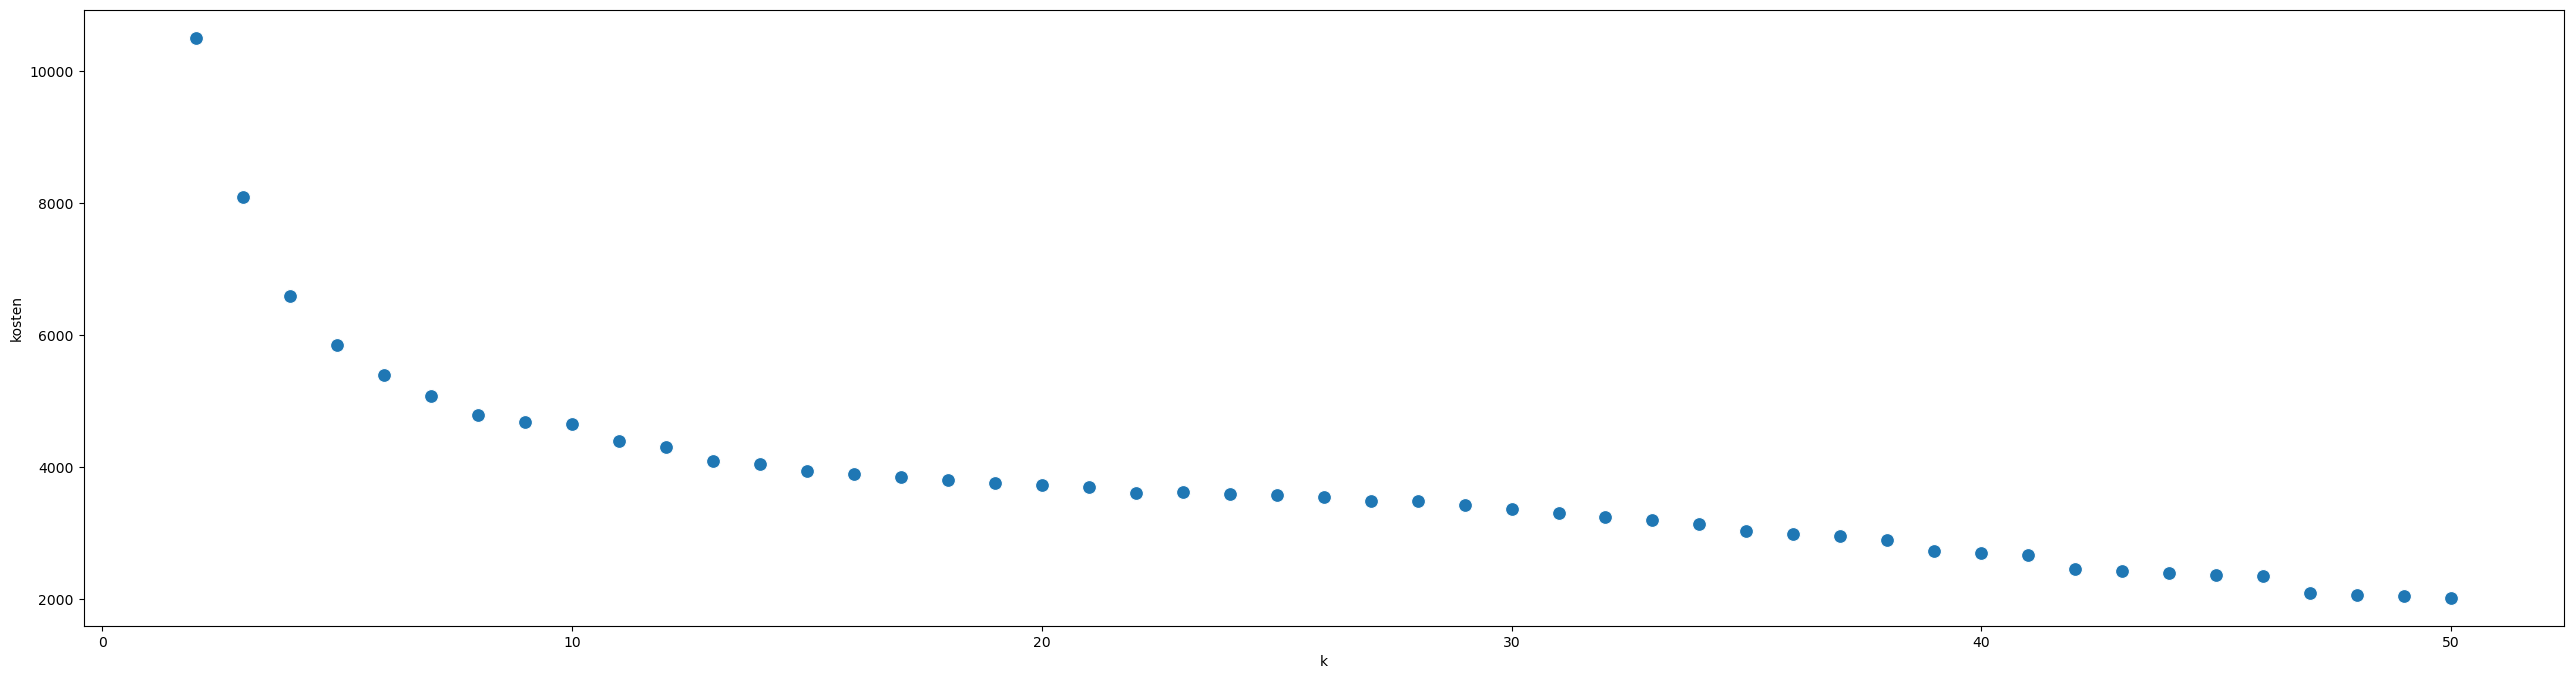

In [5]:
plotOne(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut0_frechet_2023-06-20_08-46-58.txt")

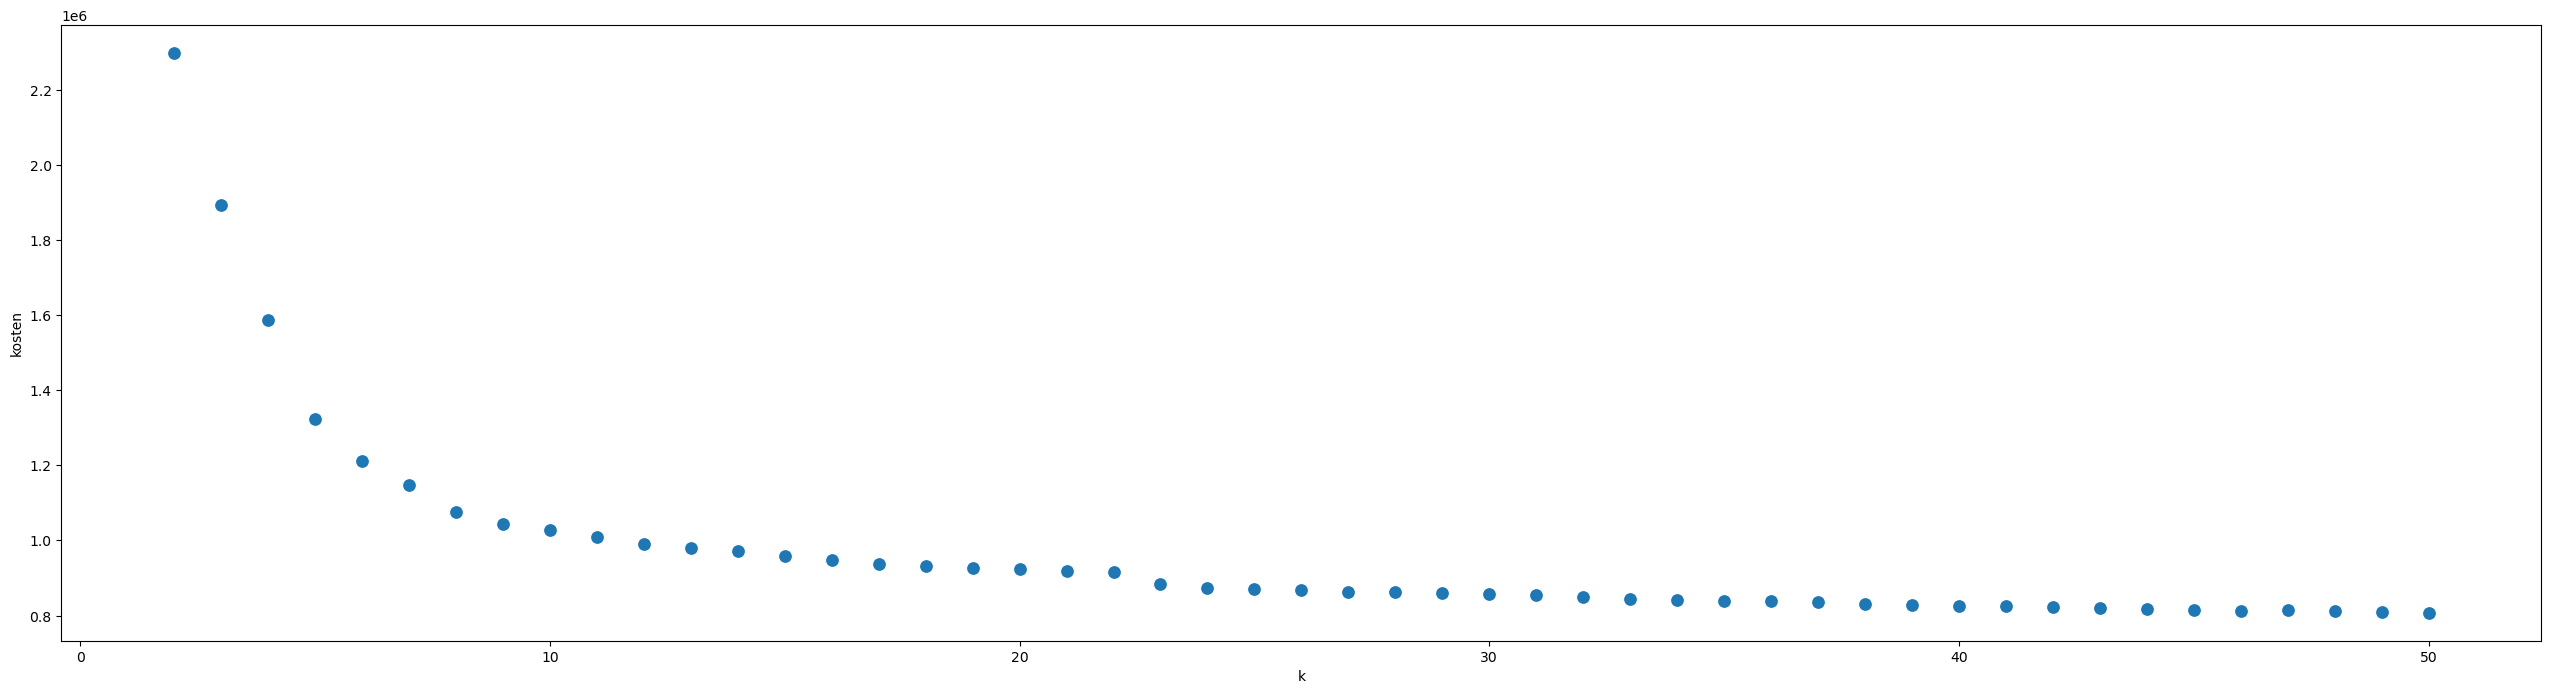

In [6]:
plotOne(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut1_frechet_2023-06-20_08-46-58.txt")

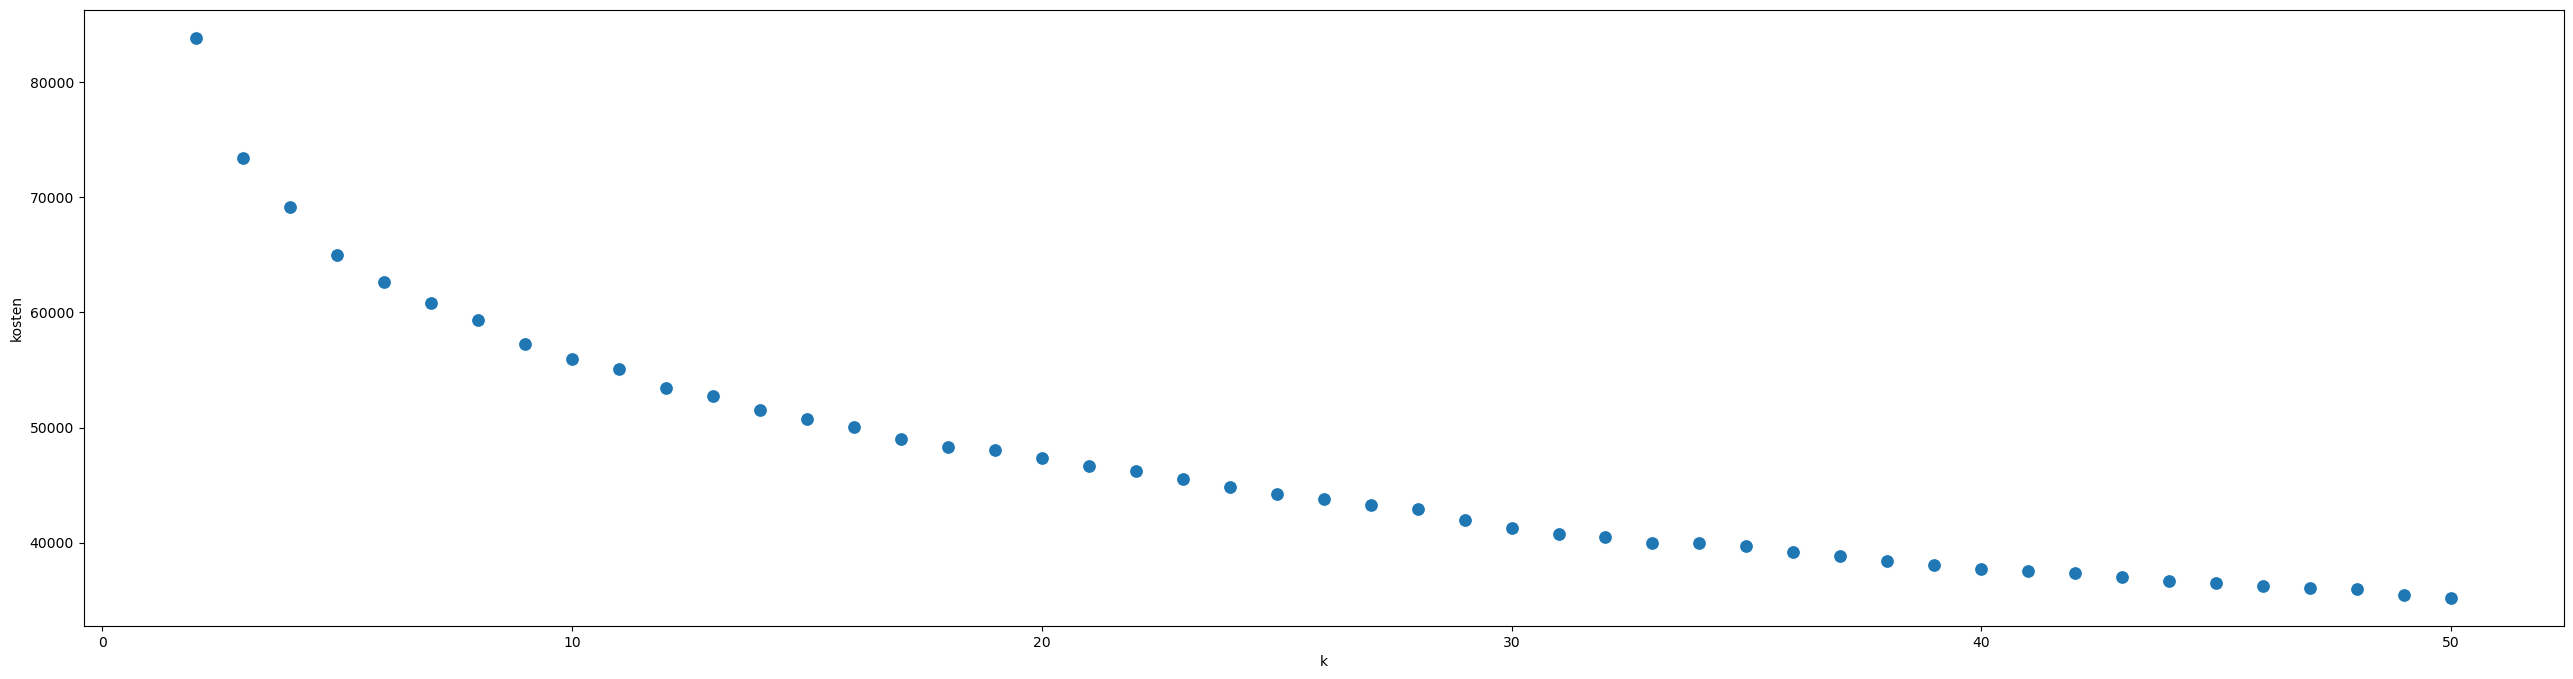

In [4]:
plotOne(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut2_frechet_2023-06-20_08-46-58.txt")

In [2]:
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\WerteKostenfunktion_Cluster_Attribut0_dtw_2023-06-21_00-59-02.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
dataArray = np.full((2, maxI), 0)
while i < maxI:
    dataArray[0][i] = dataFromTxt[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\WerteKostenfunktion_Cluster_Attribut1_dtw_2023-06-21_00-59-02.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
while i < maxI:
    dataArray[1][i] = dataFromTxt[i]
    i += 1
    
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\WerteKostenfunktion_Cluster_Attribut2_dtw_2023-06-21_00-59-02.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
dataArray2 = np.full((2, maxI), 0)
while i < maxI:
    dataArray2[0][i] = dataFromTxt[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\WerteKostenfunktion_Cluster_Gesamt_dtw_2023-06-21_00-59-02.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
while i < maxI:
    dataArray2[1][i] = dataFromTxt[i]
    i += 1

In [2]:
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut0_dtw_2023-06-21_17-29-04.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
dataArray = np.full((2, maxI), 0)
while i < maxI:
    dataArray[0][i] = dataFromTxt[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut1_dtw_2023-06-21_17-29-04.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
while i < maxI:
    dataArray[1][i] = dataFromTxt[i]
    i += 1
    
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut2_dtw_2023-06-21_17-29-04.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
dataArray2 = np.full((2, maxI), 0)
while i < maxI:
    dataArray2[0][i] = dataFromTxt[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Gesamt_dtw_2023-06-21_17-29-04.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
while i < maxI:
    dataArray2[1][i] = dataFromTxt[i]
    i += 1

In [3]:
def plotFirstTwo():
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (32,8))
    for clusterNr in range(2):
        X = []
        Y = []
        for x in range(dataArray[clusterNr].size):
            X.append(x+2)
            Y.append(dataArray[clusterNr][x])
        df = pd.DataFrame({'X': X,'Y': Y})
        # use the seaborn hue statement to differentiate the different species
        sns.scatterplot(ax=ax[clusterNr], x="X", y="Y", data = df,s=100)
        #plt.ylim(0, 1501)
        #plt.xlim(0, 1501)
        ax[clusterNr].set_xlabel("k")
        ax[clusterNr].set_ylabel("kosten")
        #ax[clusterNr].legend(fontsize=12)

    plt.show()
    
def plotSecondTwo():
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (32,8))
    for clusterNr in range(2):
        X = []
        Y = []
        for x in range(dataArray2[clusterNr].size):
            X.append(x+2)
            Y.append(dataArray2[clusterNr][x])
        df = pd.DataFrame({'X': X,'Y': Y})
        # use the seaborn hue statement to differentiate the different species
        sns.scatterplot(ax=ax[clusterNr], x="X", y="Y", data = df,s=100)
        #plt.ylim(0, 1501)
        #plt.xlim(0, 1501)
        ax[clusterNr].set_xlabel("k")
        ax[clusterNr].set_ylabel("kosten")
        #ax[clusterNr].legend(fontsize=12)

    plt.show()

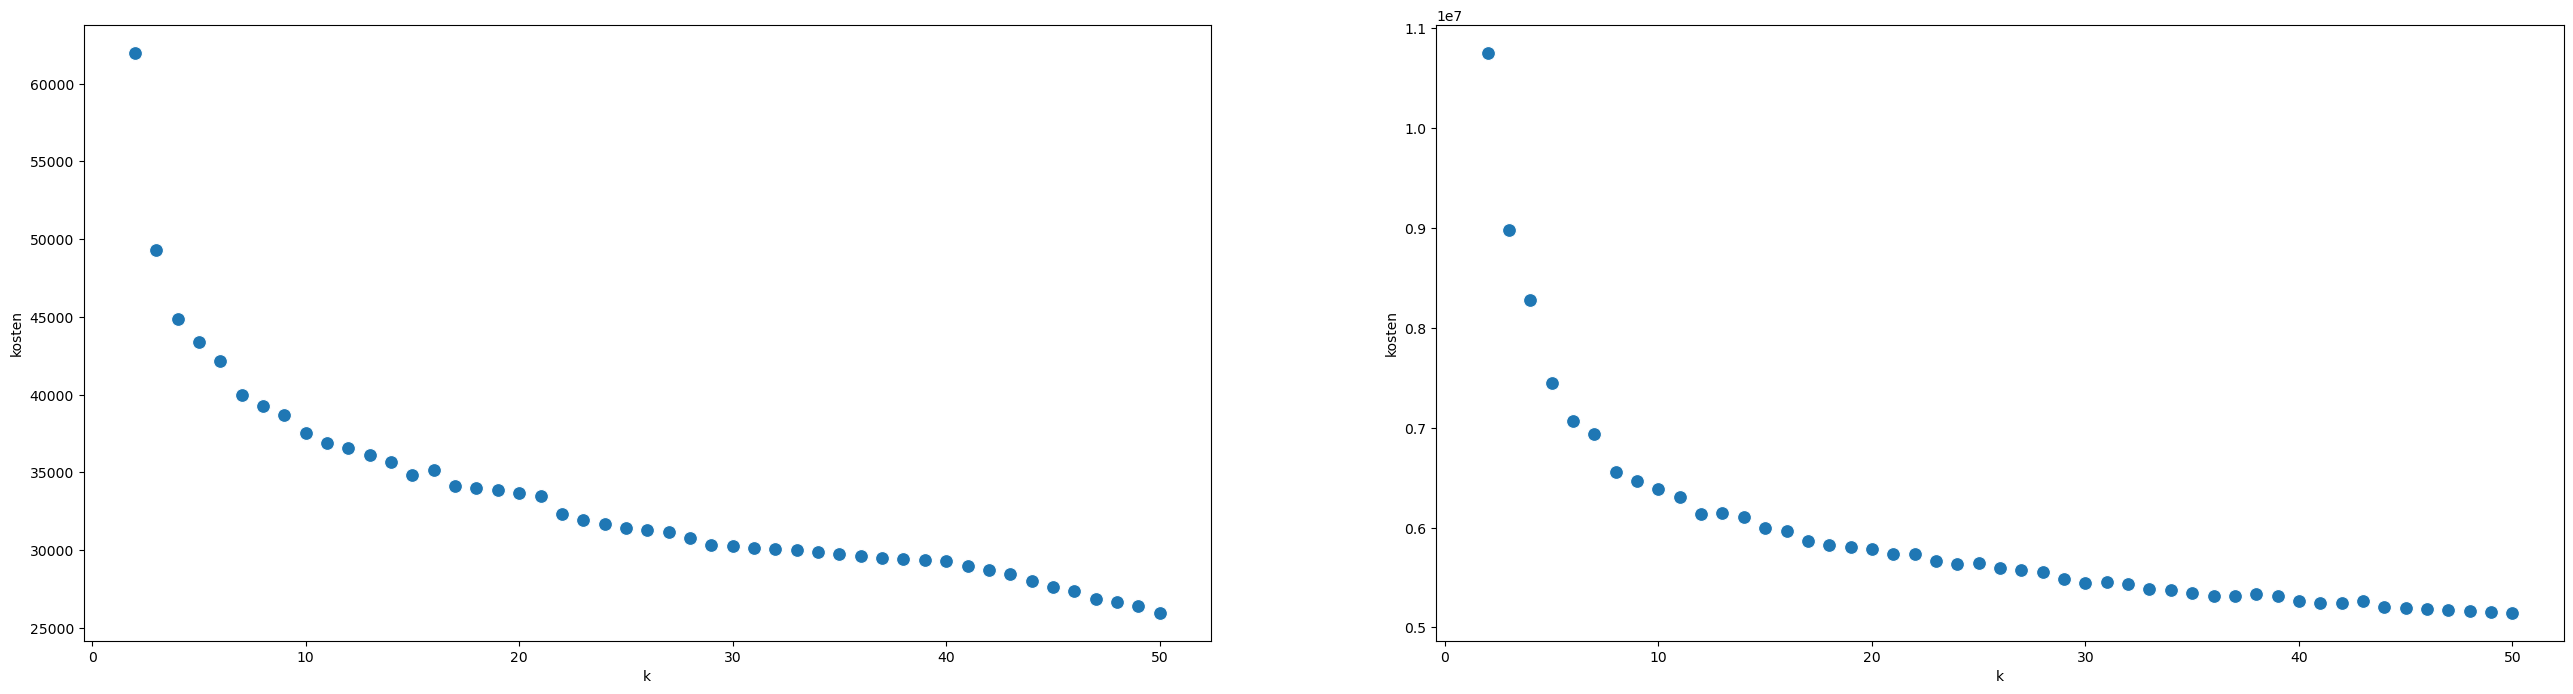

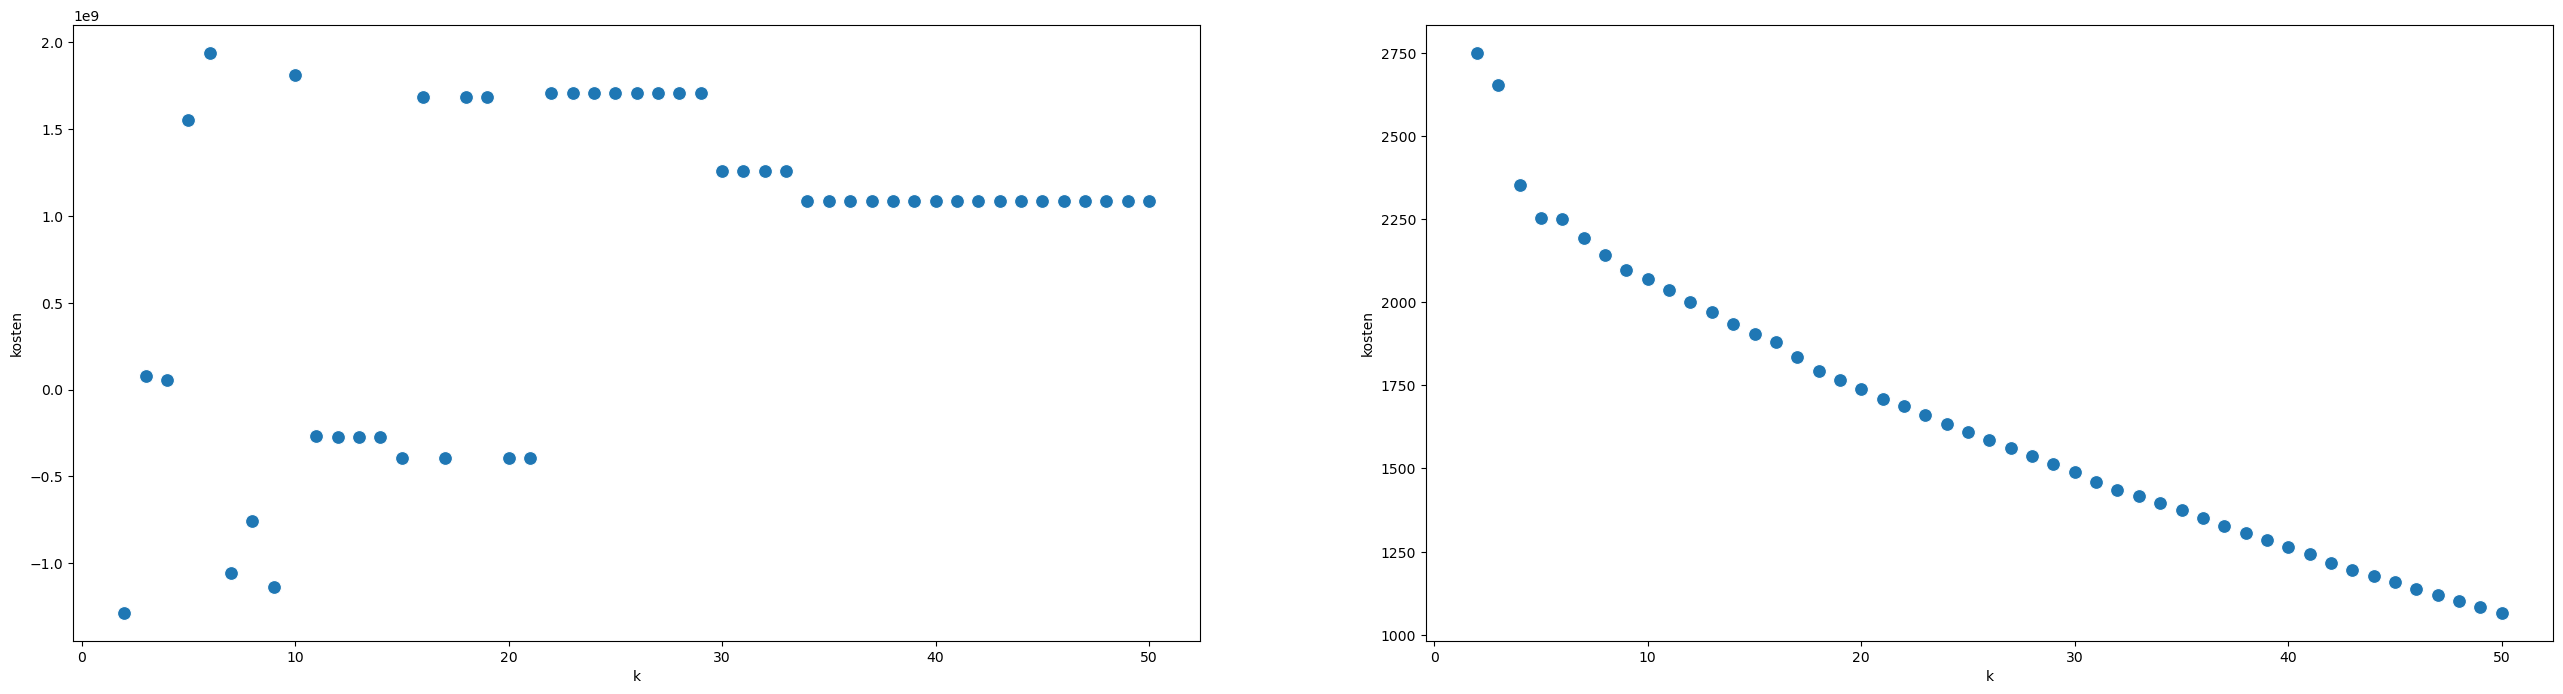

In [4]:
#Ausgewählte, kleinere Graphen
plotFirstTwo()
plotSecondTwo()

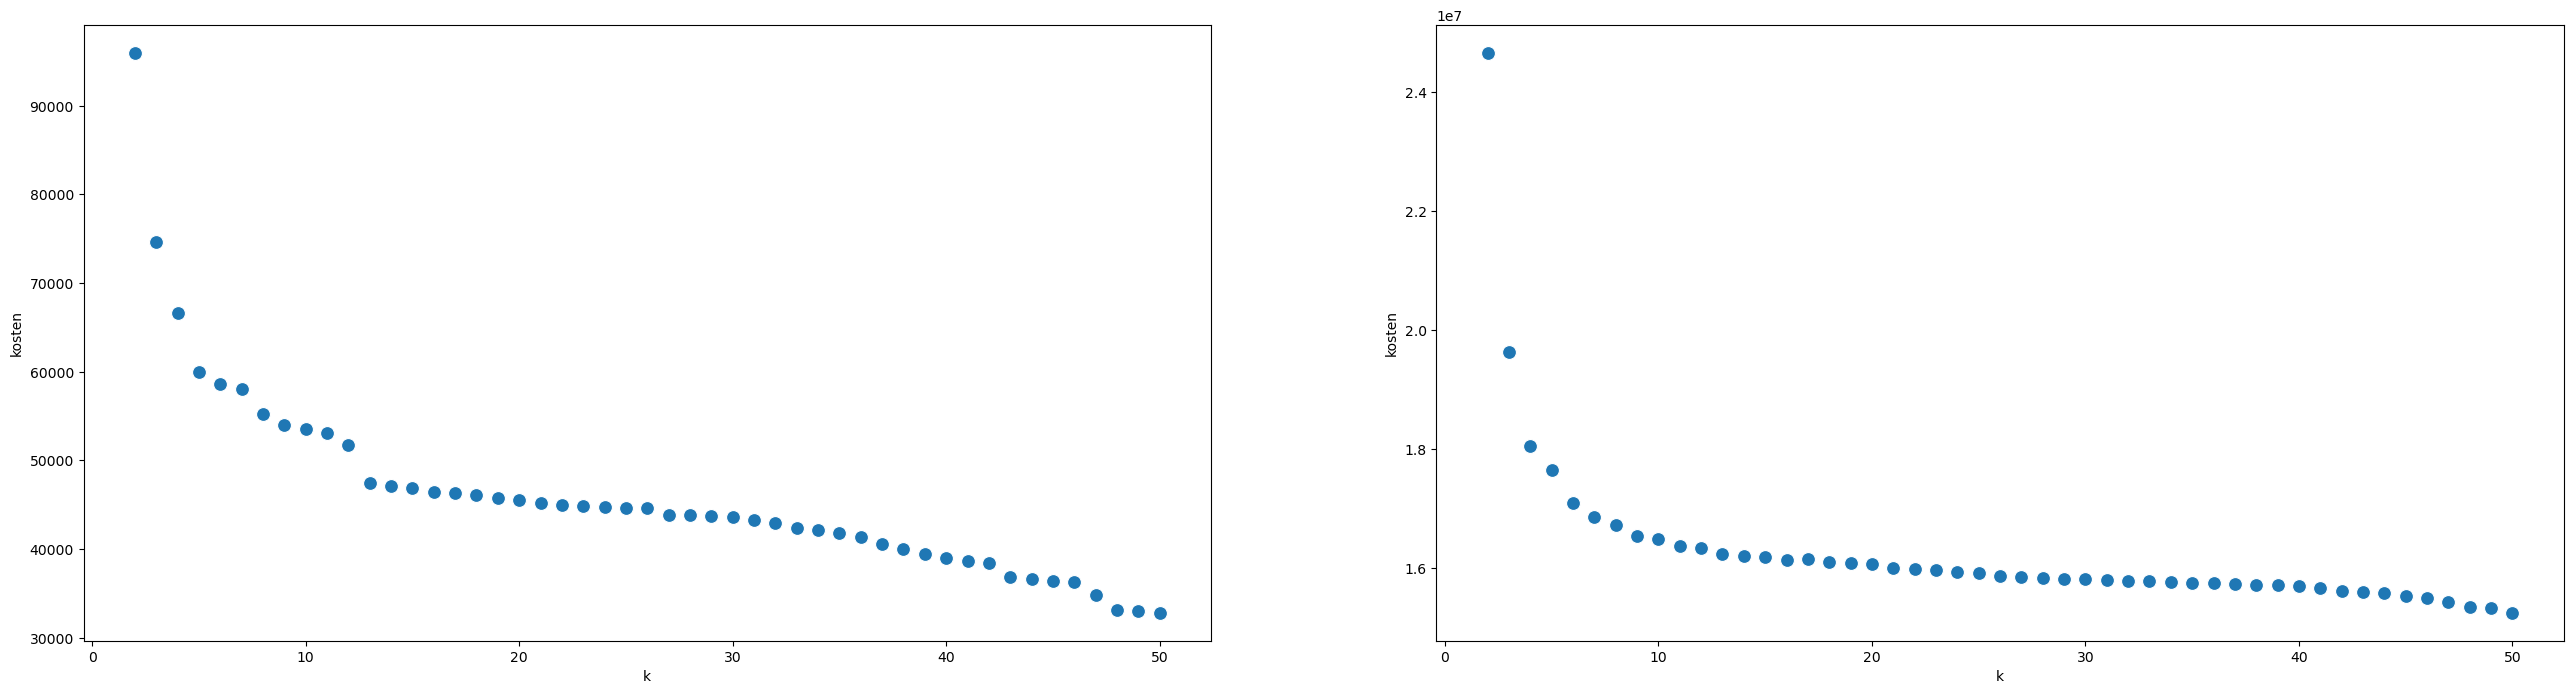

In [5]:
#DTW Attribut Anzahl ZHK und Max V ZHK
plotFirstTwo()

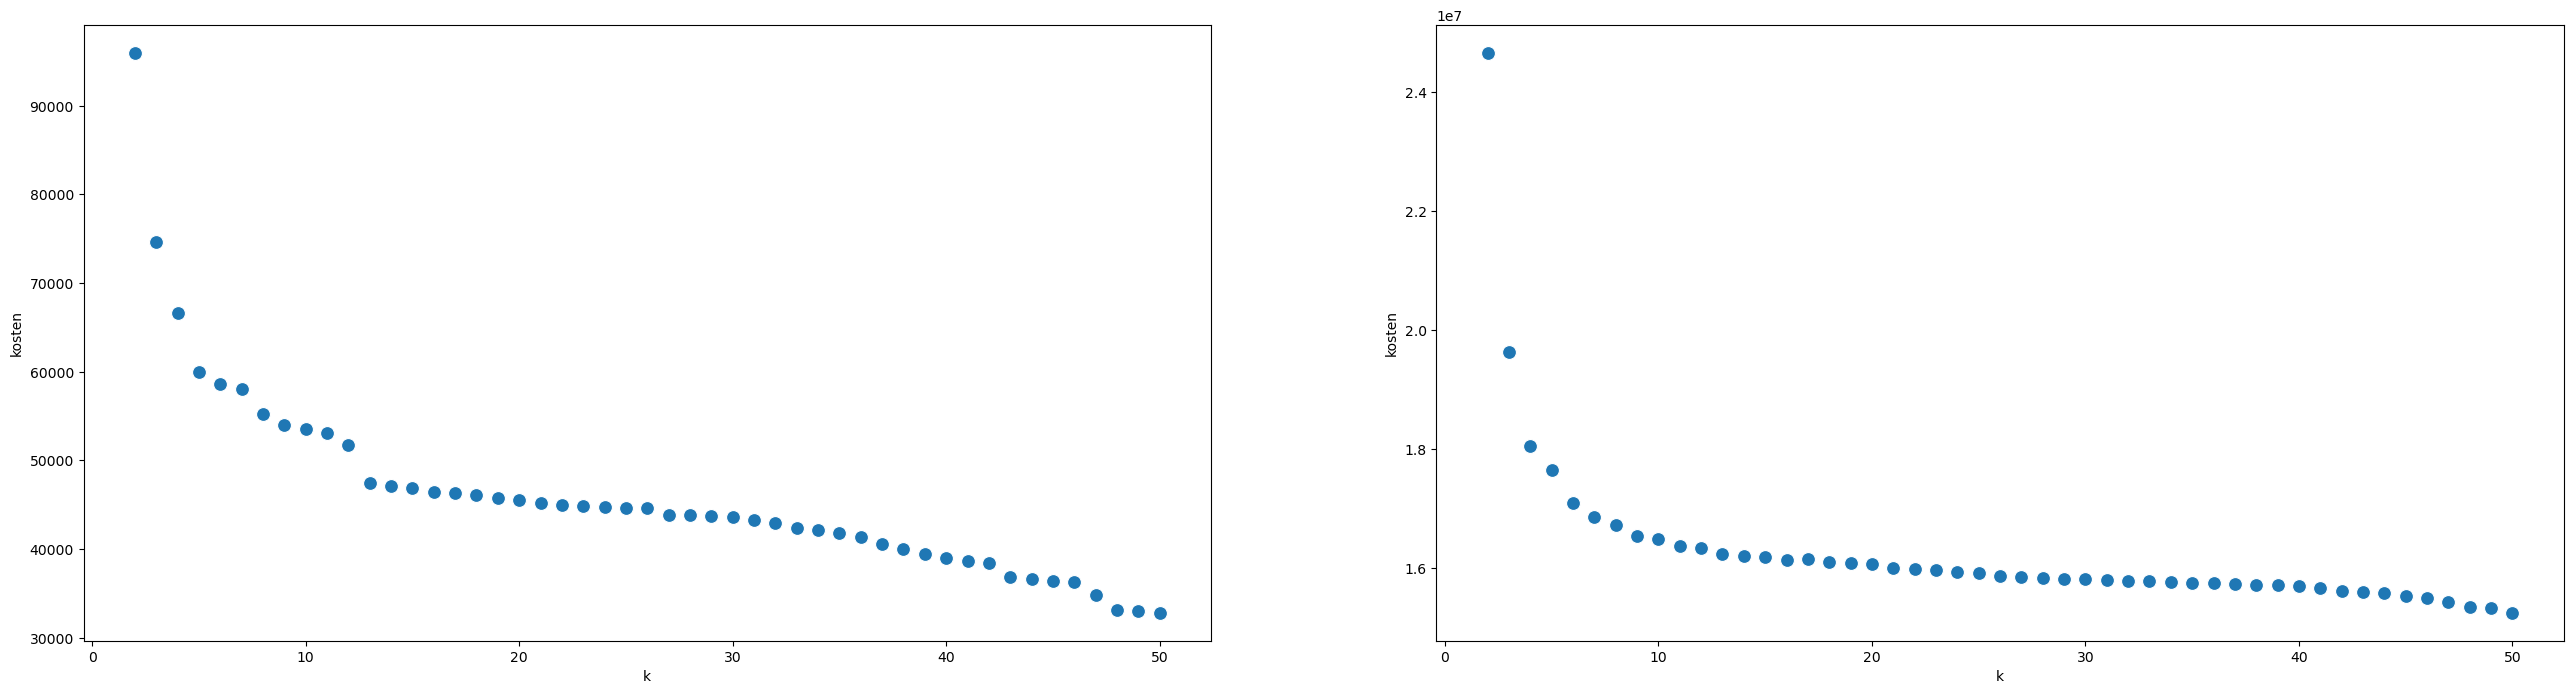

In [13]:
#DTW Attribut Anzahl ZHK und Max V ZHK
plotFirstTwo()

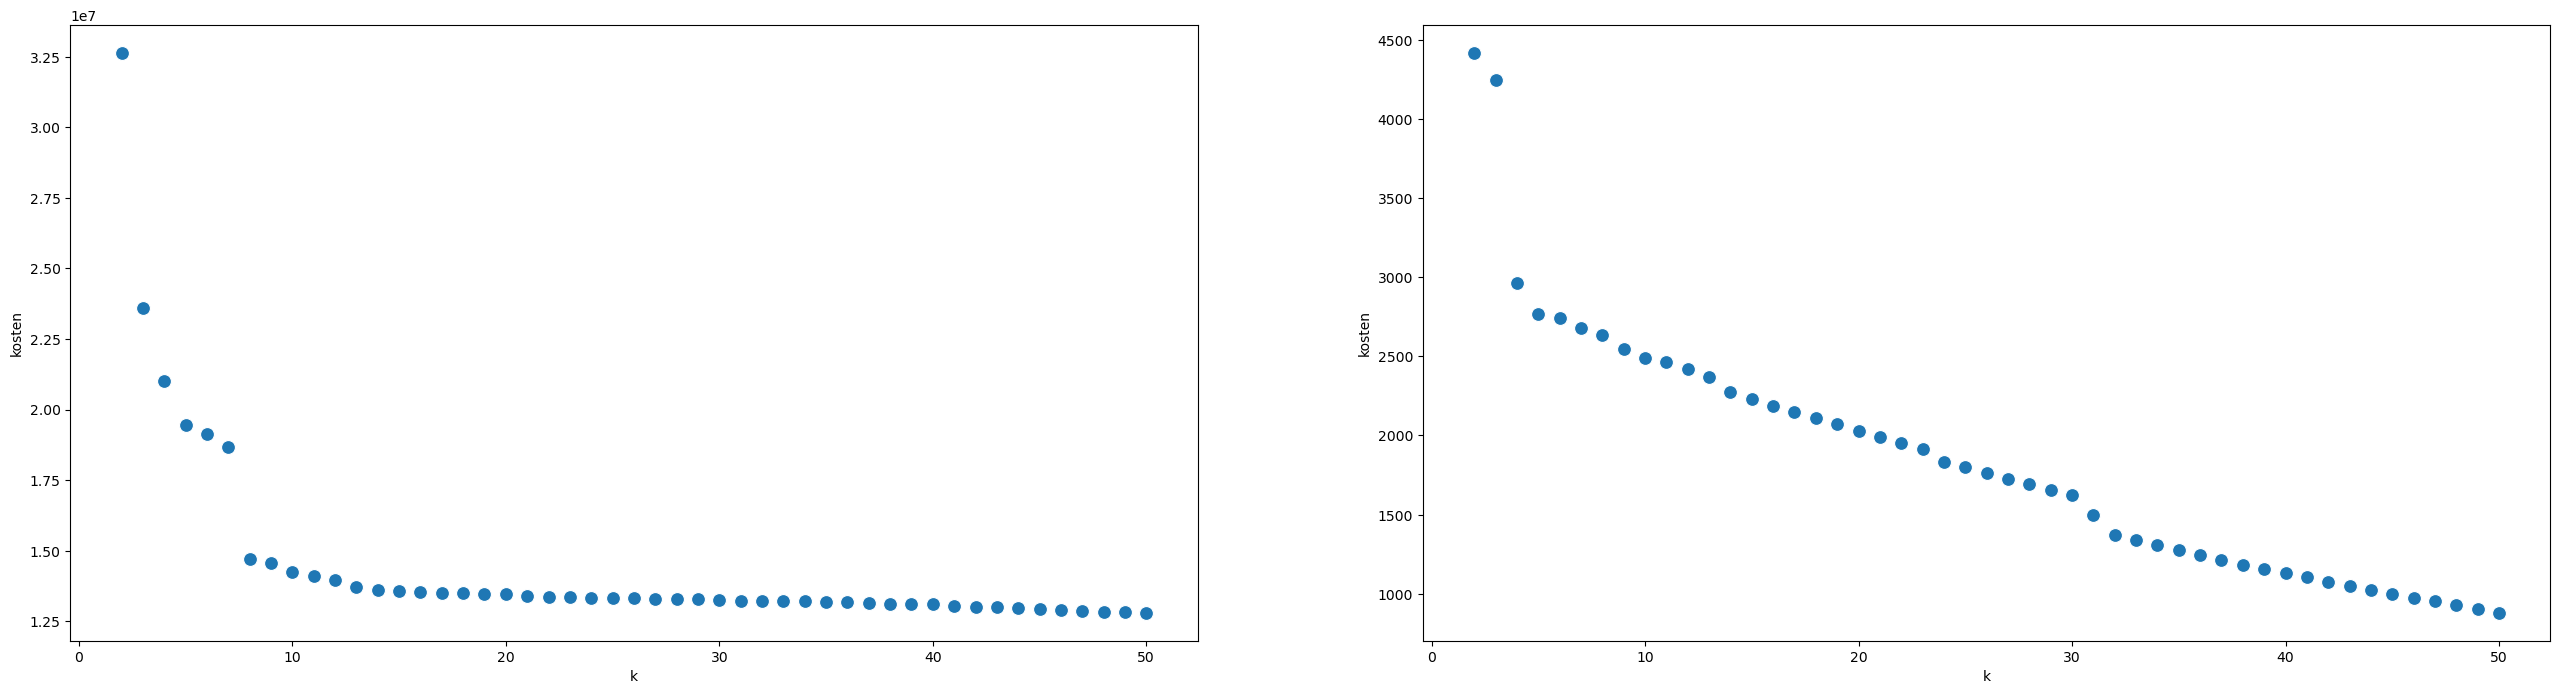

In [6]:
#DTW Attribut V Gesamt pro T und Attirbute Gesamt
plotSecondTwo()

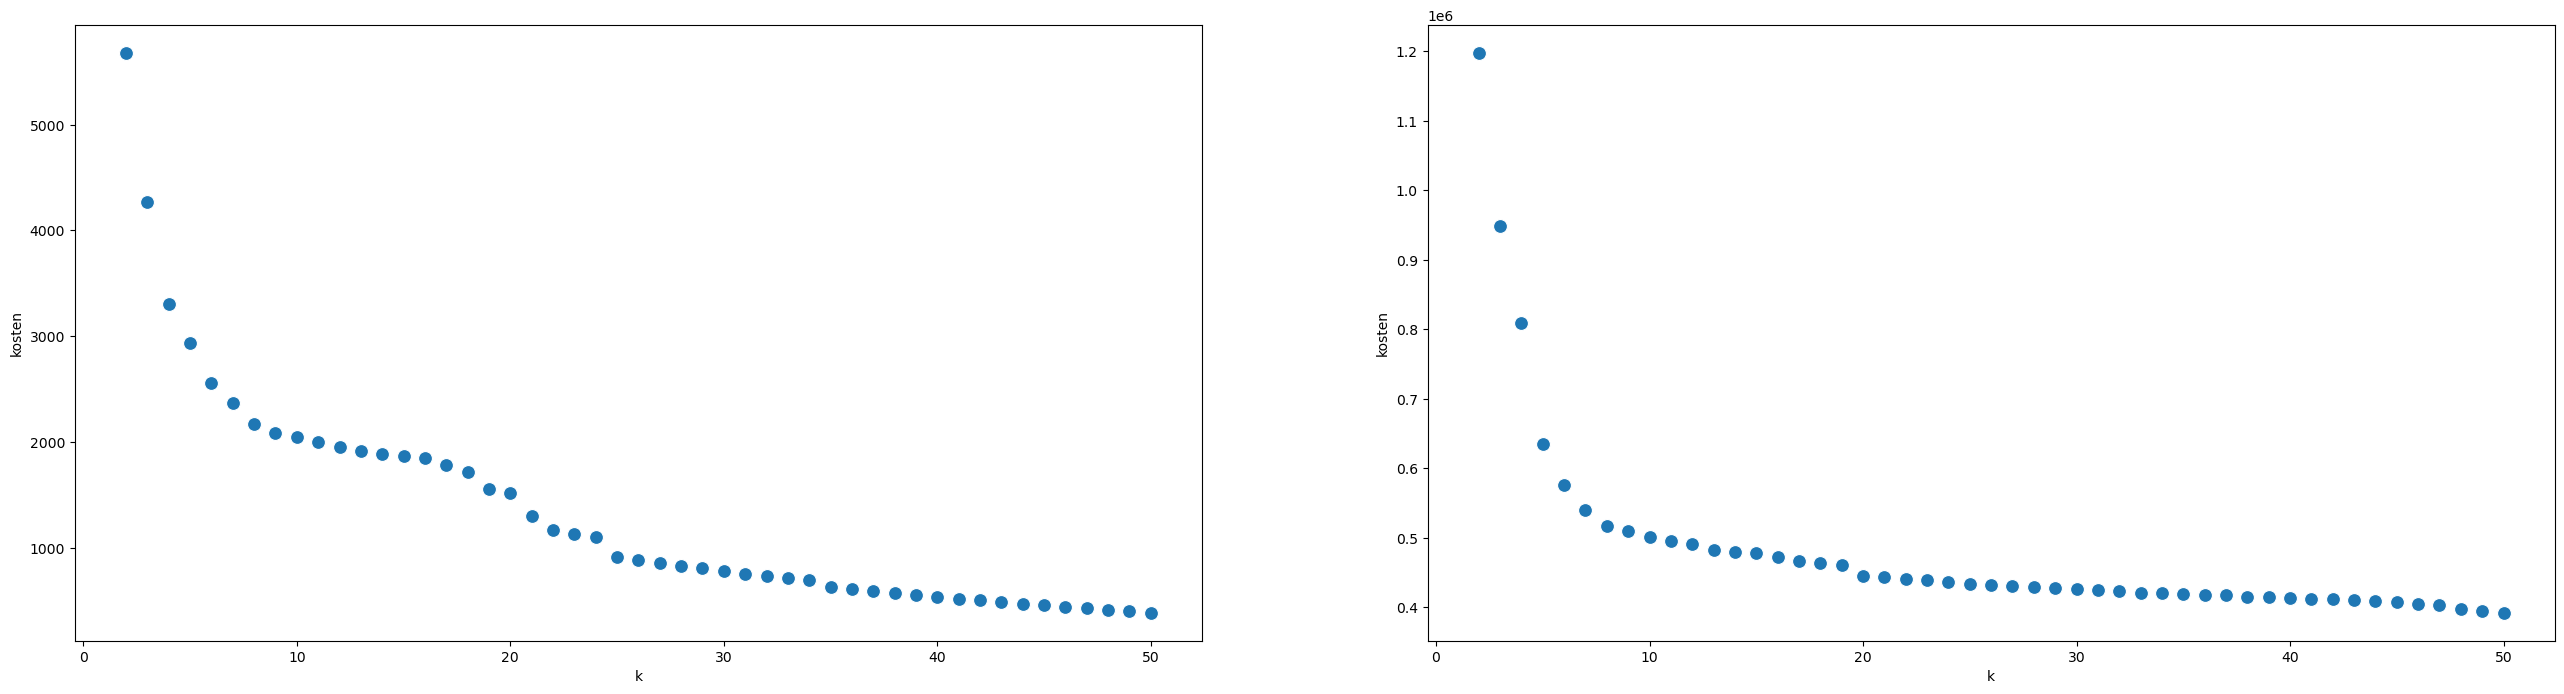

In [8]:
#Frechet Attribut Anzahl ZHK und Max V ZHK
plotFirstTwo()

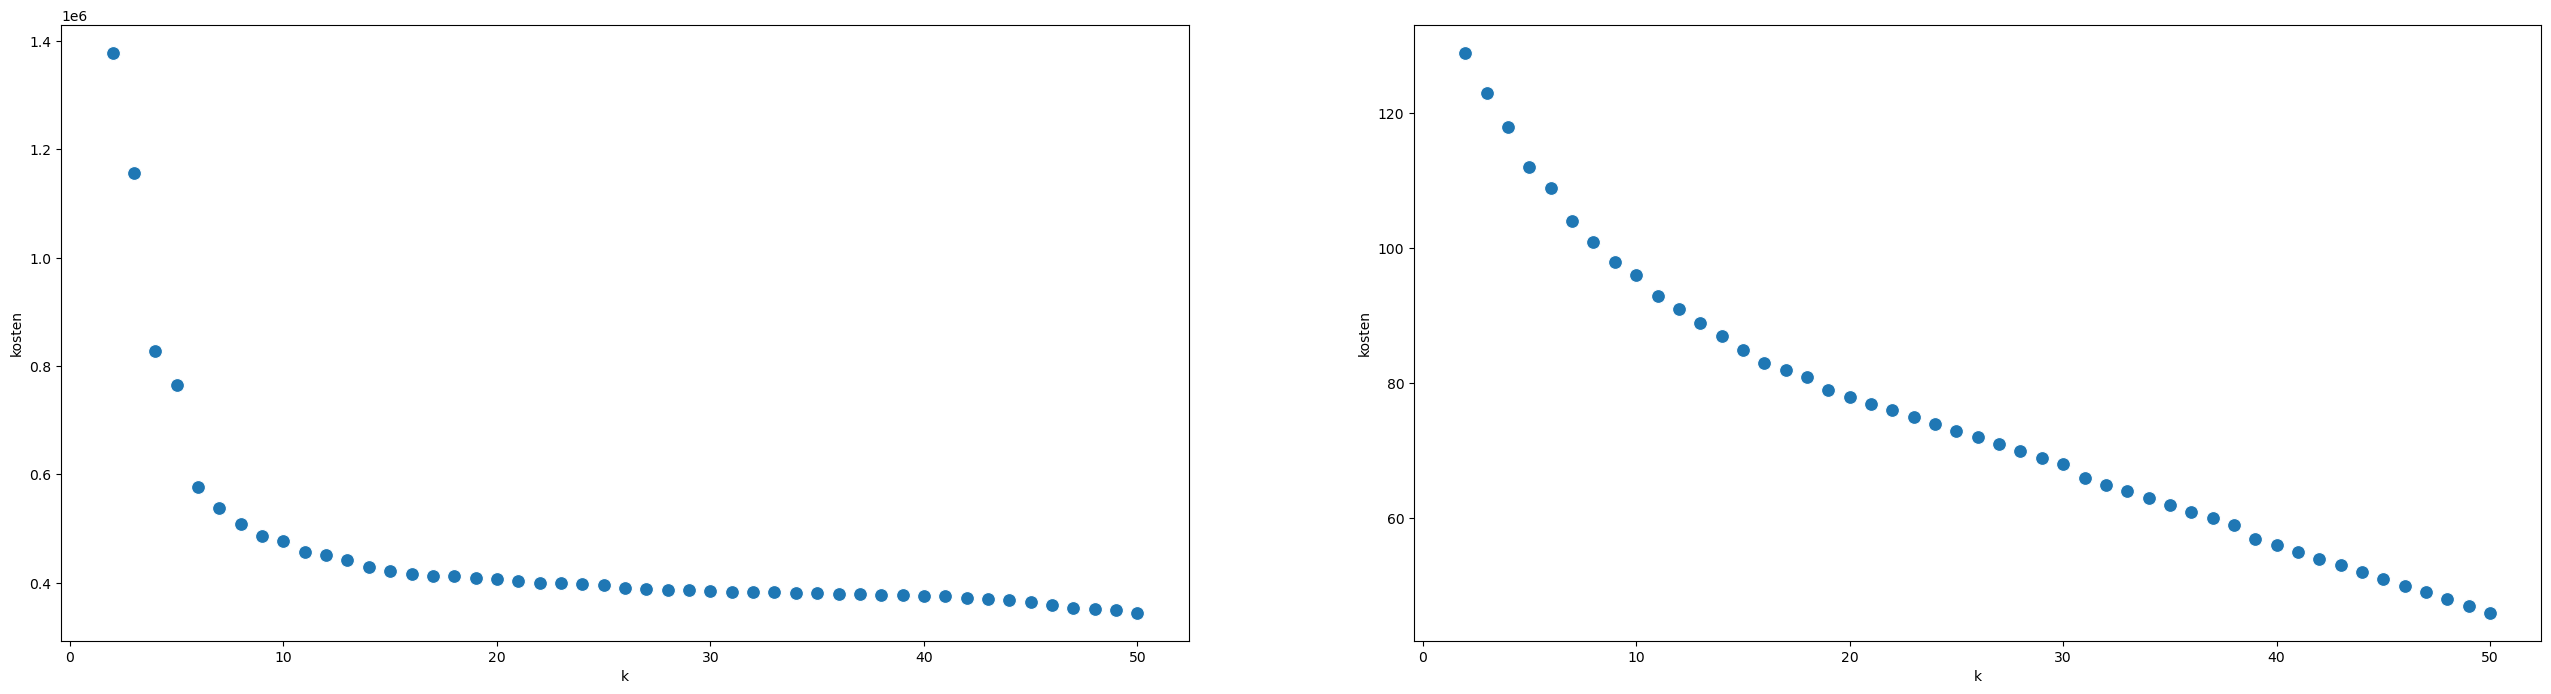

In [9]:
#Frechet Attribut V Gesamt pro T und Attirbute Gesamt
plotSecondTwo()

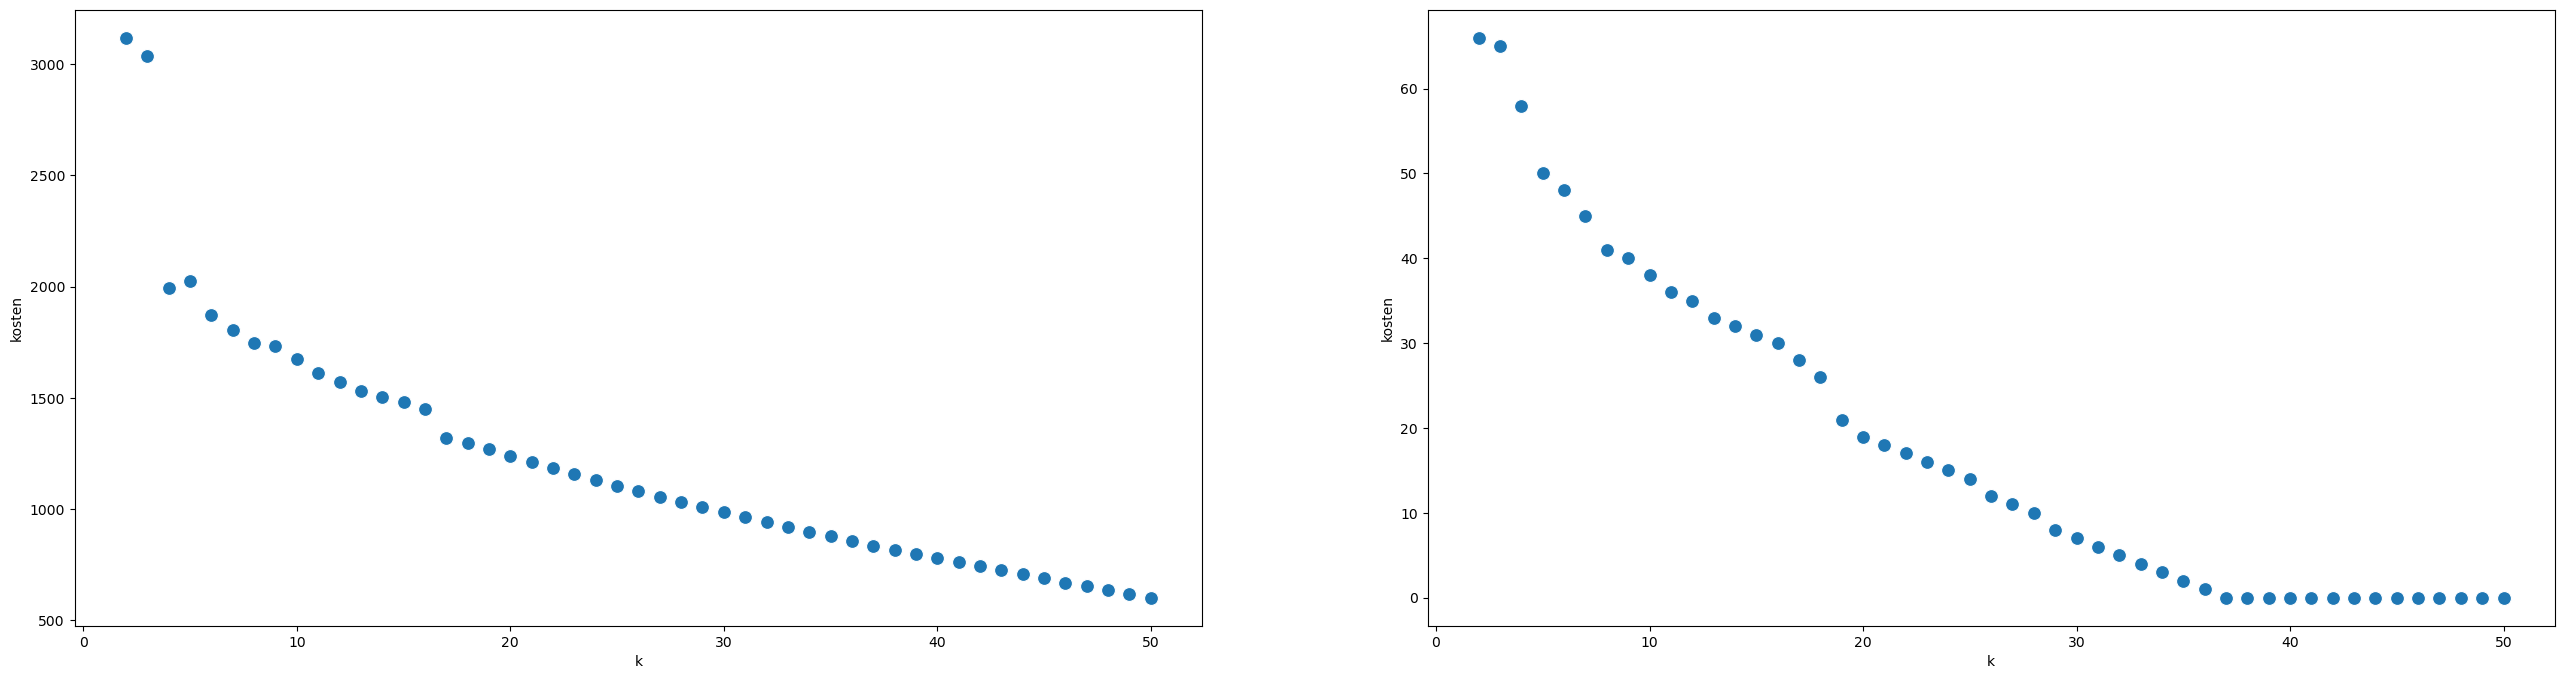

In [11]:
#DTW und Frechet Attirbute Gesamt
plotSecondTwo()

In [18]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\k_5_cluster_Attribut0_dtw_2023-06-21_00-56-50.txt",5,3)
clusterMembers

array([[49,  9, 17],
       [63,  1,  2],
       [15, 35, 36],
       [93,  0,  3],
       [34, 42, 56]])

gewählt i: 4 j: 2


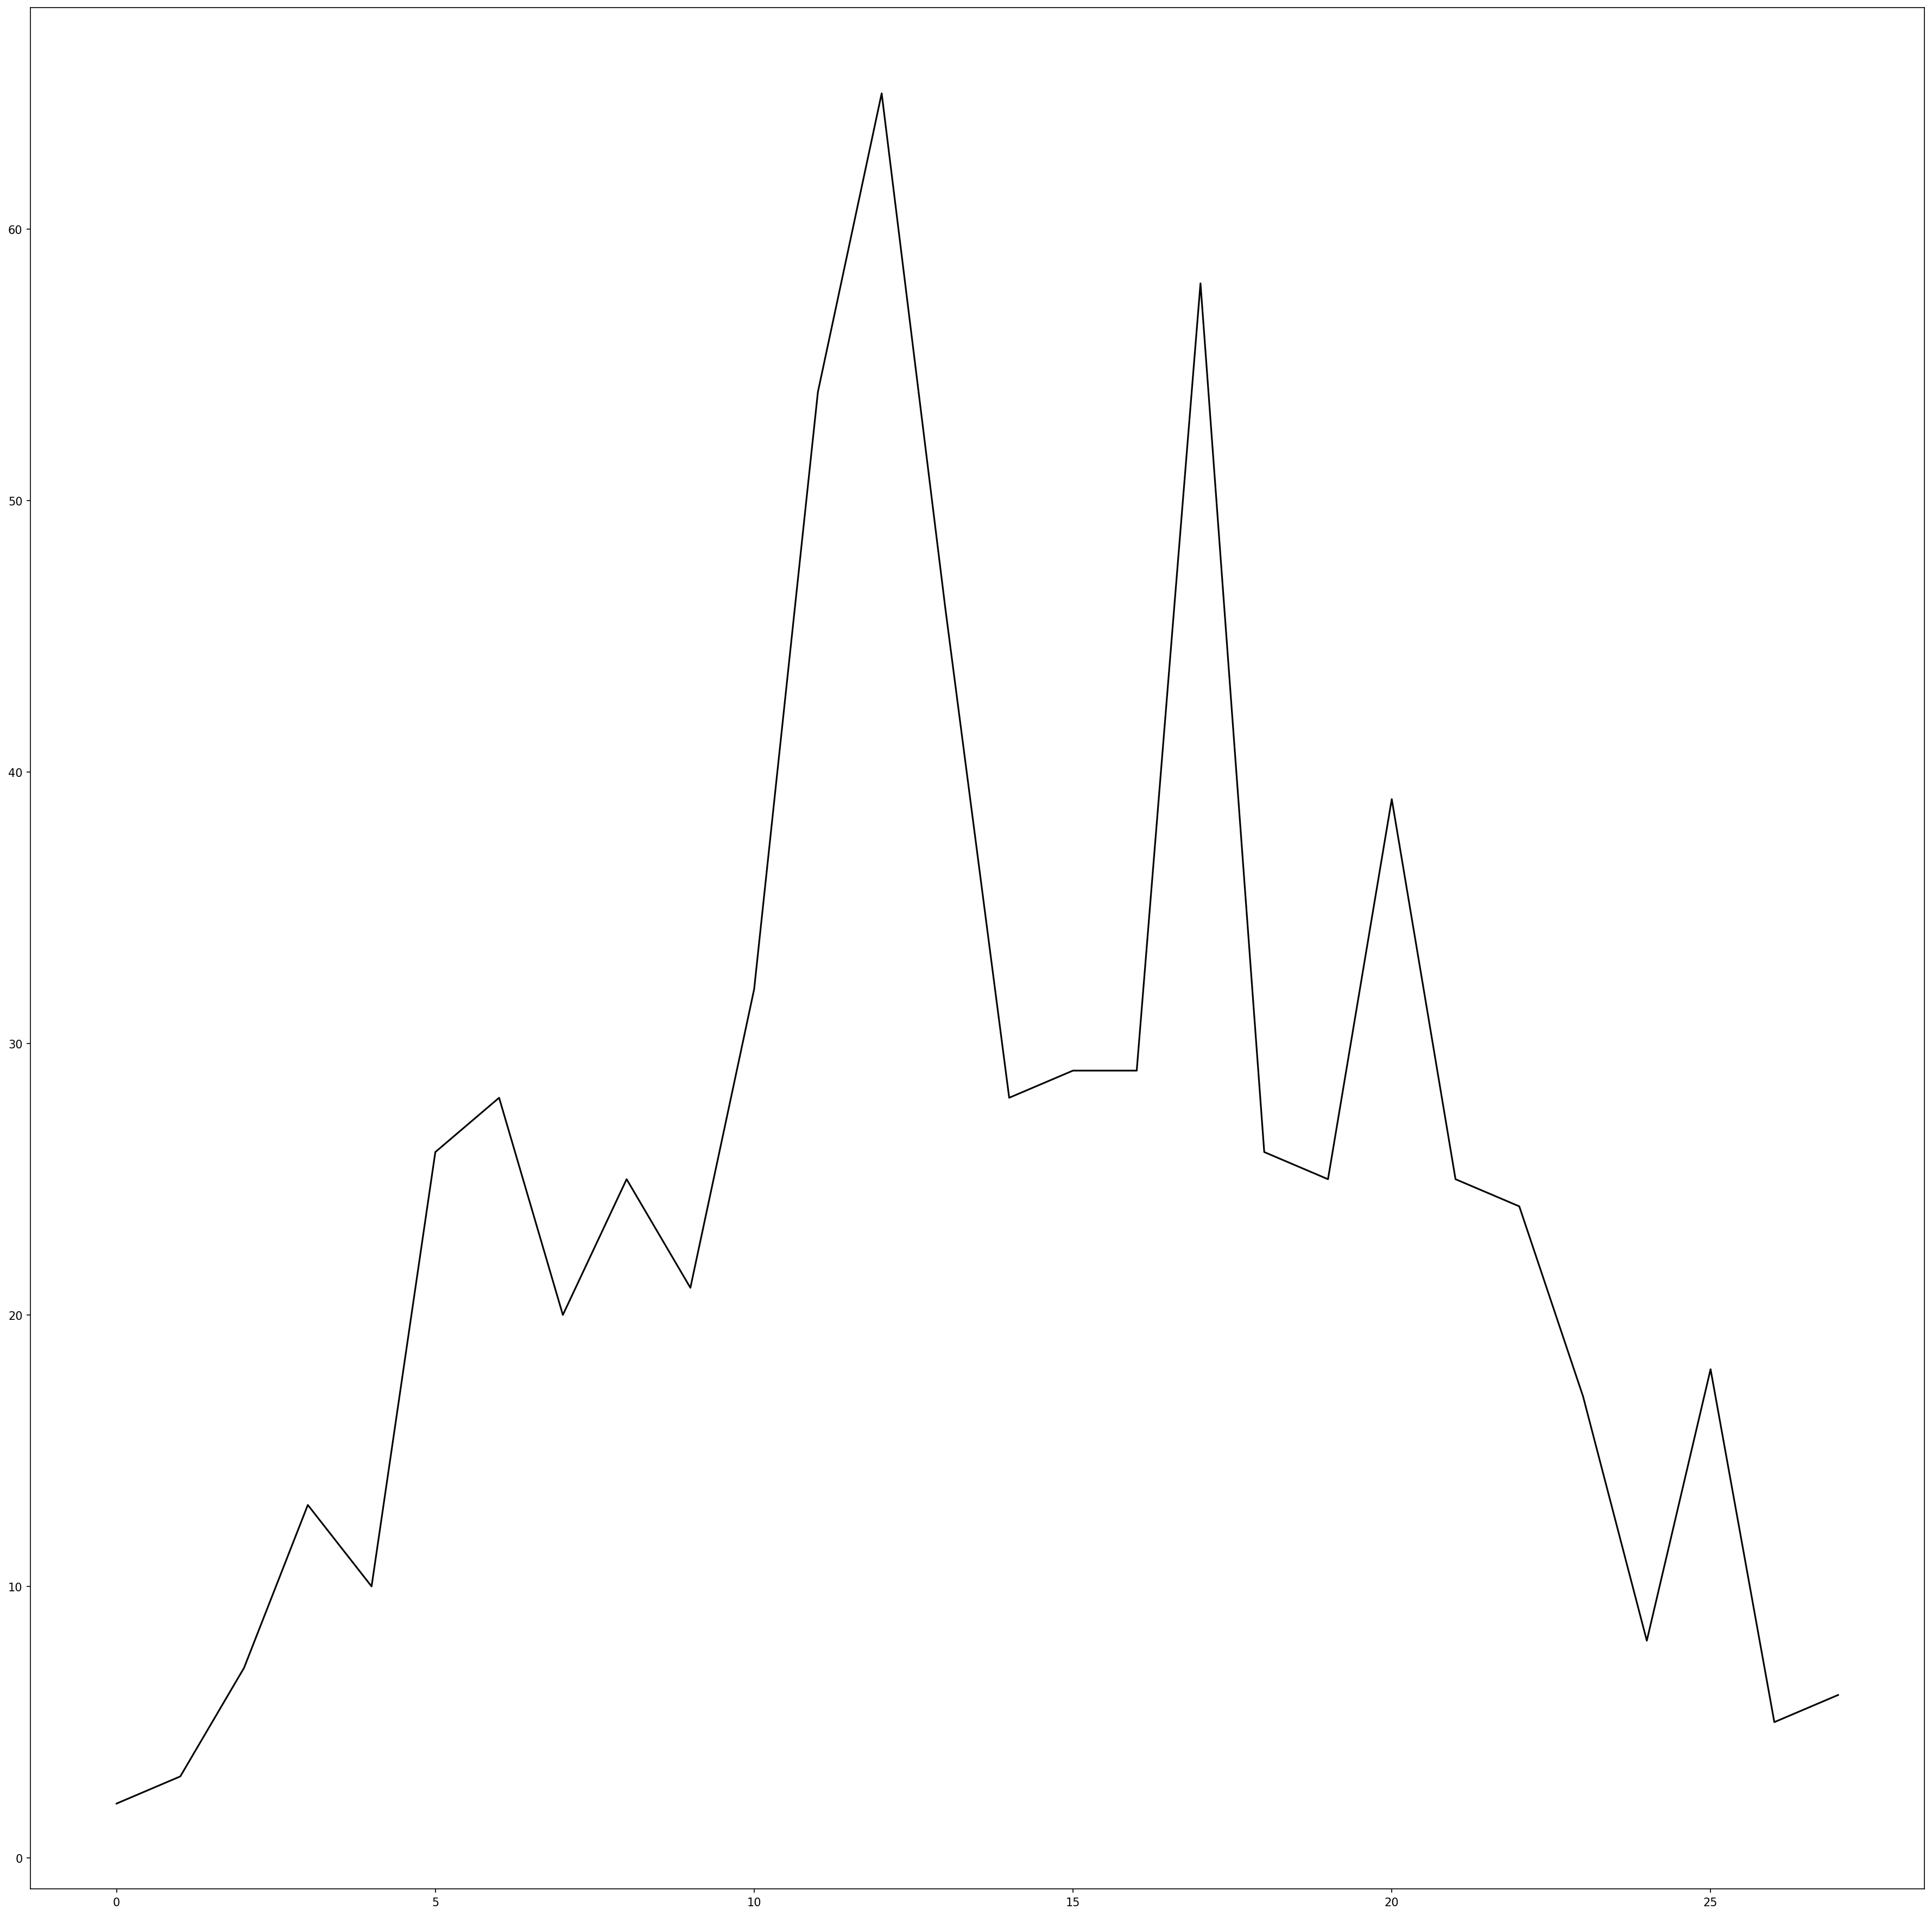

In [40]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
i = 0
j = 0
plt.figure(figsize=(30, 30), dpi=150)
colors = ['orange','blue','green','red','black','magenta']
while i < len(clusterMembers):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename) 
        if i < len(clusterMembers) and "graphNr"+str(clusterMembers[i][j]) in str(f) and "attributNr0" in str(f):
            dataFromTxt = np.loadtxt(f, dtype=int)
            #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
            if i== 4 and j == 2:
                df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                print("gewählt i: "+str(i) + " j: "+str(j))
                df['NrZhk'].plot(label='NrZhk', color=colors[i])
            j += 1
            if j == clusterMembers[i].size:
                i += 1
                j = 0
        
#plt.figure(figsize=(16, 8), dpi=150)
#for z in range(i):
#    df['NrZhk'+str(z)].plot(label='NrZhk', color='orange')
    

array([[16,  6, 12],
       [35, 42, 56],
       [39, 15, 17],
       [93,  1,  2],
       [71,  0,  3]])

gewählt i: 0 j: 0
gewählt i: 0 j: 1
gewählt i: 0 j: 2
gewählt i: 2 j: 0
gewählt i: 2 j: 1
gewählt i: 2 j: 2
gewählt i: 3 j: 0
gewählt i: 3 j: 1
gewählt i: 3 j: 2
gewählt i: 4 j: 0
gewählt i: 4 j: 1
gewählt i: 4 j: 2


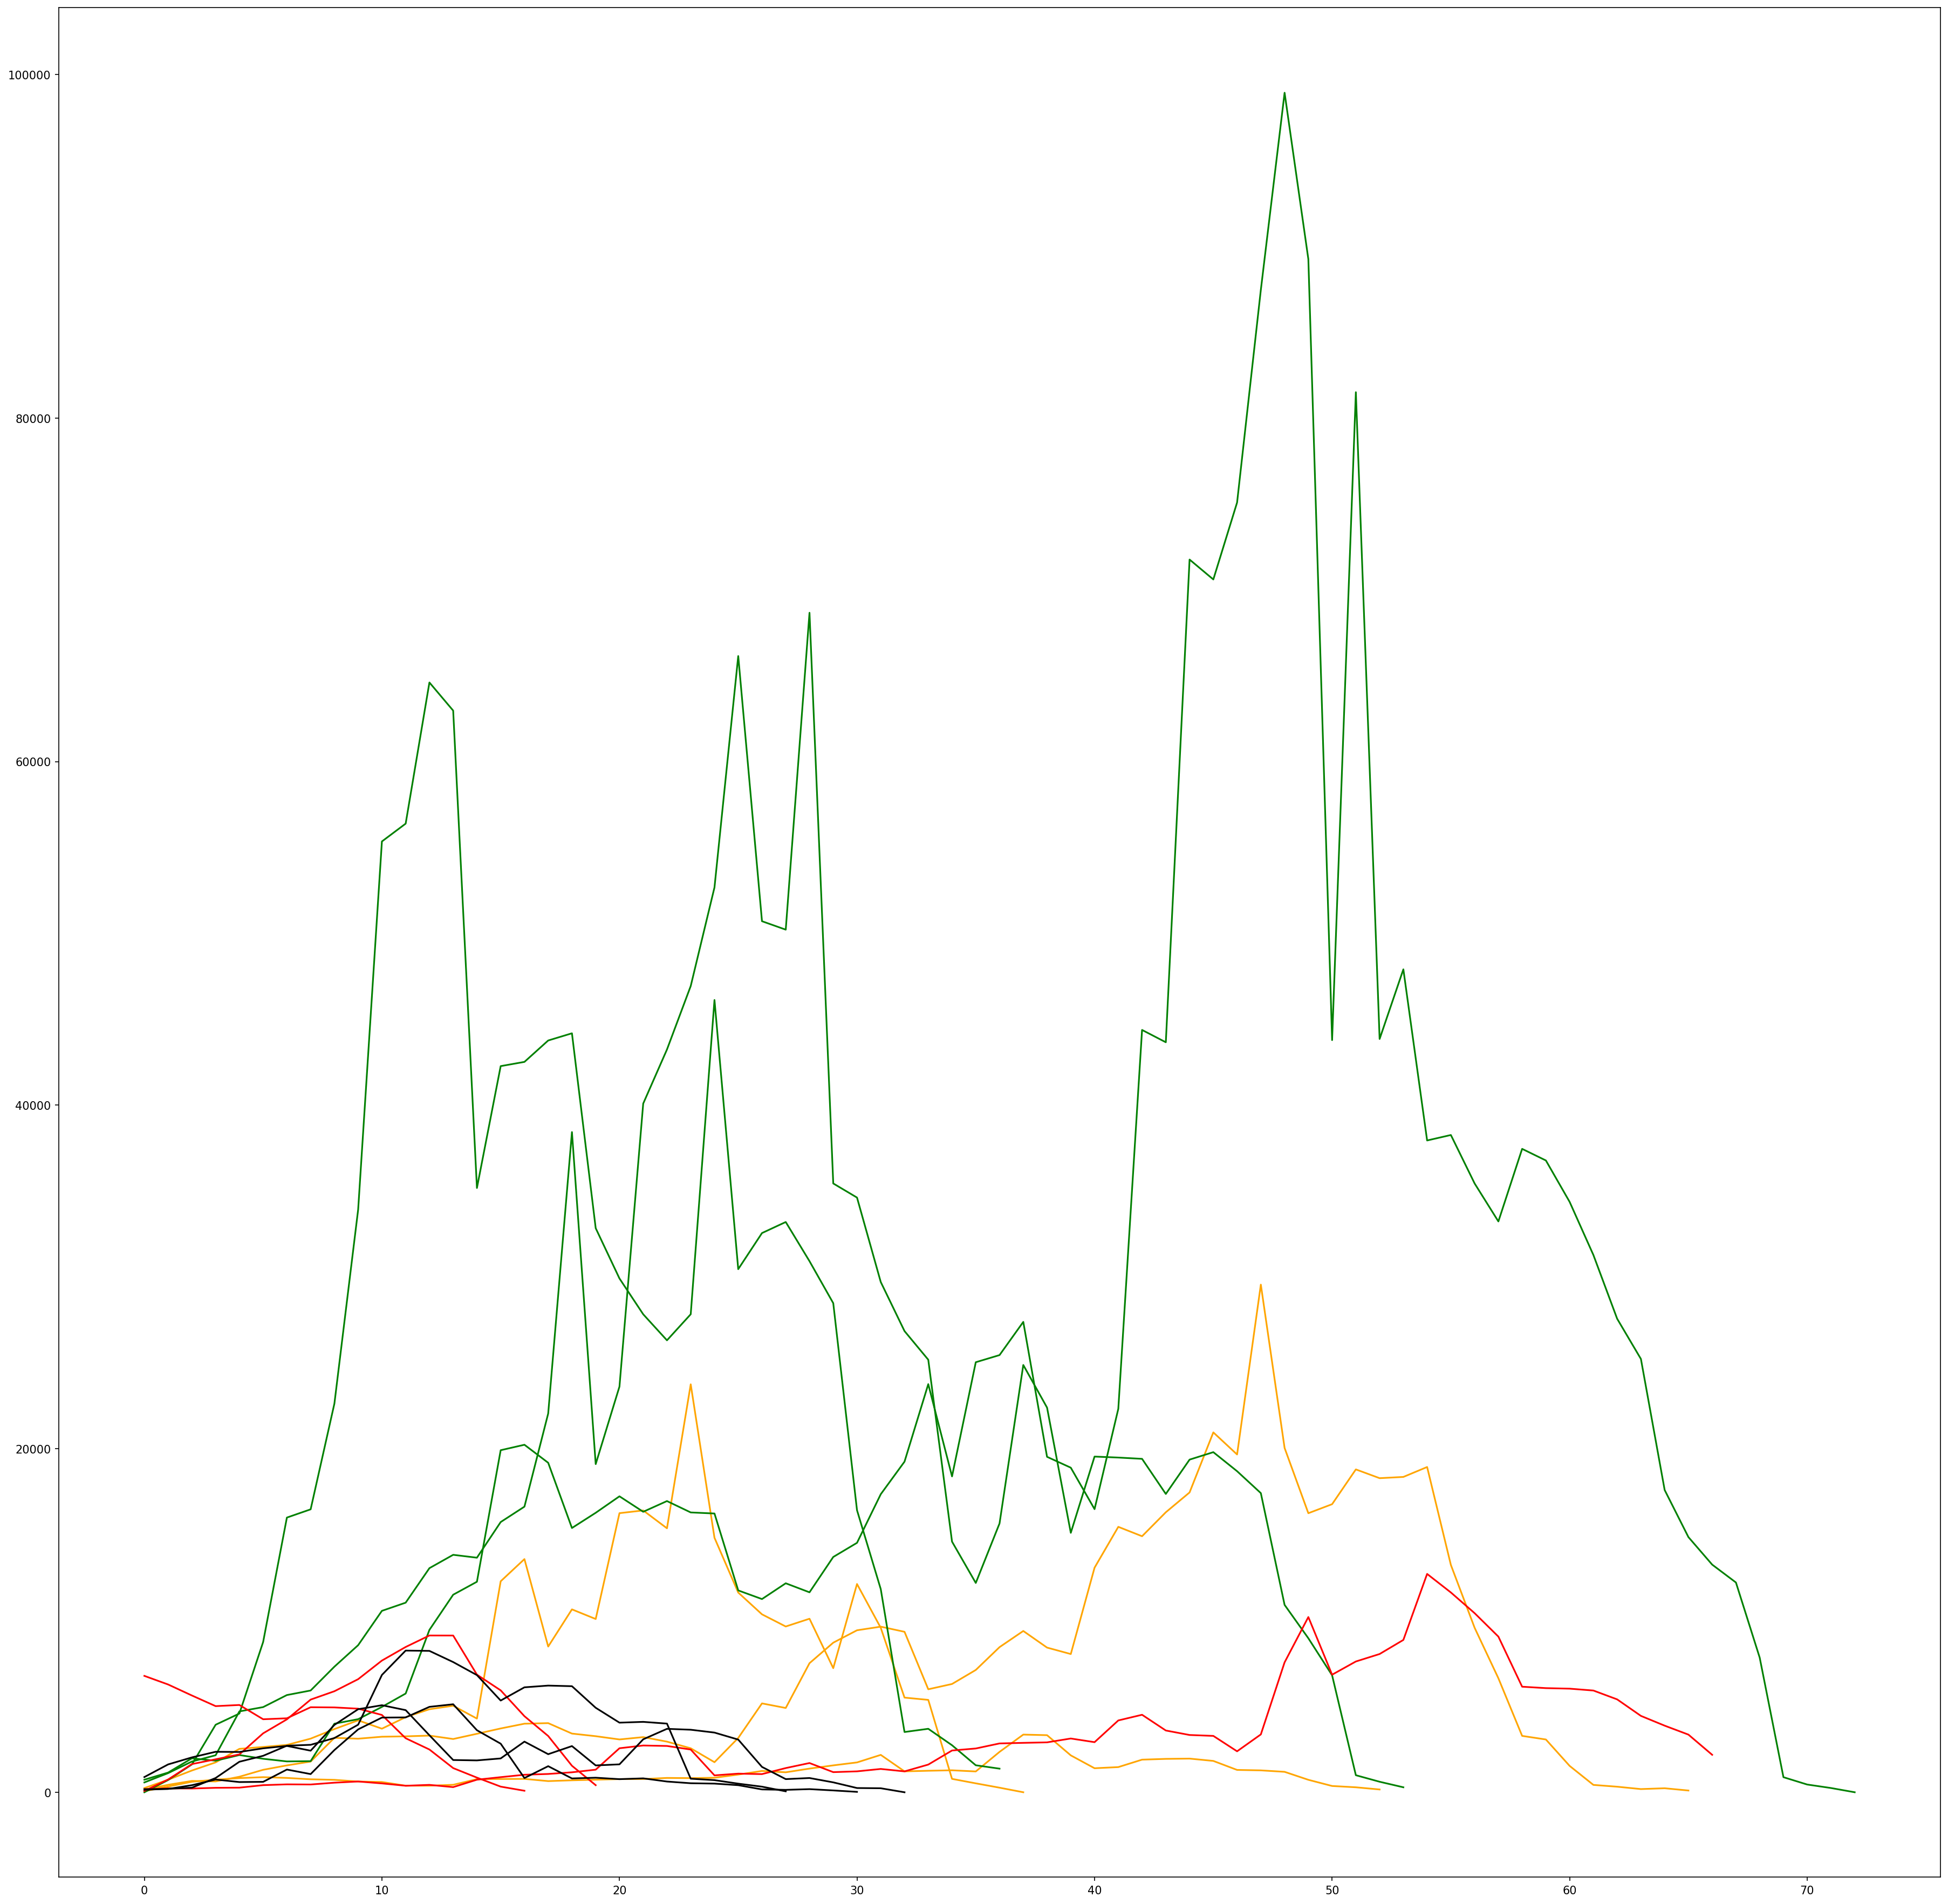

In [47]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
i = 0
j = 0
plt.figure(figsize=(30, 30), dpi=150)
colors = ['orange','blue','green','red','black','magenta']
while i < len(clusterMembers):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename) 
        if i < len(clusterMembers) and "graphNr"+str(clusterMembers[i][j]) in str(f) and "attributNr1" in str(f):
            dataFromTxt = np.loadtxt(f, dtype=int)
            #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
            if i1:
                df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                print("gewählt i: "+str(i) + " j: "+str(j))
                df['NrZhk'].plot(label='NrZhk', color=colors[i])
            j += 1
            if j == clusterMembers[i].size:
                i += 1
                j = 0

In [ ]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"

In [74]:
def readInCluster(path,nrCluster,nrMemeberCluster):    
    dataFromTxt = np.genfromtxt(path, delimiter='\t', dtype=str)
    clusterMembers = np.full((nrCluster, nrMemeberCluster), 0)
    z = 0
    currCluster = 0
    for i in range(nrCluster):
        for j in range(nrMemeberCluster):
                
            clusterMembers[i][j] = dataFromTxt[i].split()[j]
                
    return clusterMembers

In [75]:
def getGraphCompFilenames(clusterMembers):
    directoryZeitreihen = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\zeitreihen"
    directoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\calculateDistance"

    clusterMemberGraphCompFiles = [[]]
    for cluster in range(len(clusterMembers)-1):
        clusterMemberGraphCompFiles.append([])

    for cluster in range(len(clusterMembers)):
        for z in range(len(clusterMembers[0])):
            for filename in os.listdir(directoryZeitreihen):

                fZeitreihe = os.path.join(directoryZeitreihen, filename)

                if "graphNr"+str(clusterMembers[cluster][z])+"_" in str(fZeitreihe) and "attributNr0" in str(fZeitreihe):
                    subpattern = re.findall(r"\D(\d{8})\D", str(fZeitreihe))[0]
                    graphCompFilename = subpattern + str(fZeitreihe).split(subpattern)[1]

                    clusterMemberGraphCompFiles[cluster].append(graphCompFilename)
    
    return clusterMemberGraphCompFiles
                

In [84]:
def calculateGraphMetricsForGraphs(clusterMemberGraphCompFiles):
    directoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\calculateDistance"
    cloudmetricsOnGraphs = np.full((len(clusterMemberGraphCompFiles), len(clusterMemberGraphCompFiles[0]), 11), 0)
    
    for i in range(len(clusterMemberGraphCompFiles)):
        for j in range(len(clusterMemberGraphCompFiles[0])):
            graphMasks = readInTxtFile(directoryGraphComponents+"\\"+clusterMemberGraphCompFiles[i][j])
            metricZero = 0
            metricOne = 0
            metricTwo = 0
            metricThree = 0
            metricFour = 0
            metricFive = 0
            metricSix = 0
            metricSeven = 0
            metricEight = 0
            metricNine = 0
            metricTen = 0
            T = len(graphMasks)
            for t in range(T):
                #auf graphMasks[t] metrics anwenden und speichern
                arr = graphMasks[t]
                metricZero += cloudmetrics.mask.cloud_fraction(arr)
                metricOne += cloudmetrics.mask.fractal_dimension(arr)
                metricTwo += cloudmetrics.mask.orientation(arr)
                metricThree += cloudmetrics.mask.objects.cop_objects(arr, periodic_domain=False)
                metricFour += cloudmetrics.mask.objects.iorg_objects(arr, periodic_domain=False)
                #metricFive += cloudmetrics.mask.objects.max_object_length_scale(arr, periodic_domain=False)
                metricFive += 0
                metricSix += cloudmetrics.mask.objects.mean_object_eccentricity(arr, periodic_domain=False)
                metricSeven += cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False)
                metricEight += cloudmetrics.mask.objects.mean_object_perimeter_length(arr, periodic_domain=False)
                metricNine += cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False)
                metricTen += cloudmetrics.mask.objects.scai_objects(arr, periodic_domain=False)
            cloudmetricsOnGraphs[i][j][0] = metricZero/T
            cloudmetricsOnGraphs[i][j][1] = metricOne/T
            cloudmetricsOnGraphs[i][j][2] = metricTwo /T
            cloudmetricsOnGraphs[i][j][3] = metricThree/T
            cloudmetricsOnGraphs[i][j][4] = metricFour/T
            cloudmetricsOnGraphs[i][j][5] = metricFive/T
            cloudmetricsOnGraphs[i][j][6] = metricSix/T
            cloudmetricsOnGraphs[i][j][7] = metricSeven/T
            cloudmetricsOnGraphs[i][j][8] = metricEight/T
            cloudmetricsOnGraphs[i][j][9] = metricNine/T
            cloudmetricsOnGraphs[i][j][10] = metricTen/T
    return cloudmetricsOnGraphs
    

In [79]:
def saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, nrMetrics, bezeichner):
    path = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\cloudmetrics"
    with open(path++'.txt', 'w') as f:
        f.write(str(len(cloudmetricsOnGraphs)) + ' ' + str(len(cloudmetricsOnGraphs[0])) + ' ' + str(nrMetrics))
        for i in cloudmetricsOnGraphs:
            for j in i:
                for m in j:
                    f.write(str(m) + ' ')
            

In [85]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\k_5_cluster_Attribut0_dtw_2023-06-21_00-56-50.txt",5,3)
graphCompFilenames = getGraphCompFilenames(clusterMembers)
cloudmetricsOnGraphs = calculateGraphMetricsForGraphs(graphCompFilenames)
saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, 11,'Attribut0')

Read in text für Plotting routine
dim array zero: 3
size of txtFile 344484
0
FST
100000
200000
300000
LST
dim array first: 3
first timestamp: 128
last timestamp: 153


C:\Users\Jonathan Langer\AppData\Roaming\Python\Python39\site-packages\cloudmetrics\objects\metrics\geometry.py:70: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(objects_area * objects_ecc) / np.sum(objects_area)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


ValueError: cannot convert float NaN to integer

In [ ]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\k_5_cluster_Attribut1_dtw_2023-06-21_00-56-50.txt",5,4)
graphCompFilenames = getGraphCompFilenames(clusterMembers)
cloudmetricsOnGraphs = calculateGraphMetricsForGraphs(graphCompFilenames)
saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, 11,'Attribut1')

In [ ]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\k_5_cluster_Attribut2_dtw_2023-06-21_00-56-50.txt",5,4)
graphCompFilenames = getGraphCompFilenames(clusterMembers)
cloudmetricsOnGraphs = calculateGraphMetricsForGraphs(graphCompFilenames)
saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, 11,'Attribut2')

In [65]:
arr = np.zeros(shape = (100,100))
arr[20:30,20:30] = 1
arr[60:70,60:70] = 1


print(cloudmetrics.mask.cloud_fraction(arr))
print(cloudmetrics.mask.fractal_dimension(arr))
print(cloudmetrics.mask.orientation(arr))
print(cloudmetrics.mask.objects.cop_objects(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.iorg_objects(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.max_object_length_scale(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.mean_object_eccentricity(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.mean_object_perimeter_length(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False))
print(cloudmetrics.mask.objects.scai_objects(arr, periodic_domain=False))
help(cloudmetrics.mask)

0.02
0.4103287808412024
0.9948832907132509
0.19947114020071635
0.1339830387997054
10.0
0.0
10.0
36.0
10.0
0.02262741699796953
Help on package cloudmetrics.mask in cloudmetrics:

NAME
    cloudmetrics.mask

PACKAGE CONTENTS
    cloud_fraction
    fractal_dimension
    objects
    open_sky
    orientation

DATA
    ALL_METRIC_FUNCTIONS = {'cloud_fraction': <function cloud_fraction>, '...

FILE
    c:\users\jonathan langer\appdata\roaming\python\python39\site-packages\cloudmetrics\mask\__init__.py




In [29]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\Cluster100Graphen3AttributeInklGesVProTUndGesAttribute\k_5_cluster_Attribut1_dtw_2023-06-21_00-56-50.txt",2,1)
clusterMembers

NameError: name 'readInCluster' is not defined

In [ ]:
liste = getGraphCompFilenames(clusterMembers)
calculateGraphMetricsForGraphs(liste)

In [162]:
s = "graphNr0_attributNr2_20170603._component0_dbz25Interpol_1000.txt"
d = re.findall(r"\D(\d{8})\D", s)[0]
print(d)
s.split(d)

20170603


['graphNr0_attributNr2_', '._component0_dbz25Interpol_1000.txt']

<class 'numpy.ndarray'>
   NrZhk0
0       4
1       5
2      13
3      14
4      11
5      18
6       7
7       7
8       5
9       5


<AxesSubplot:>

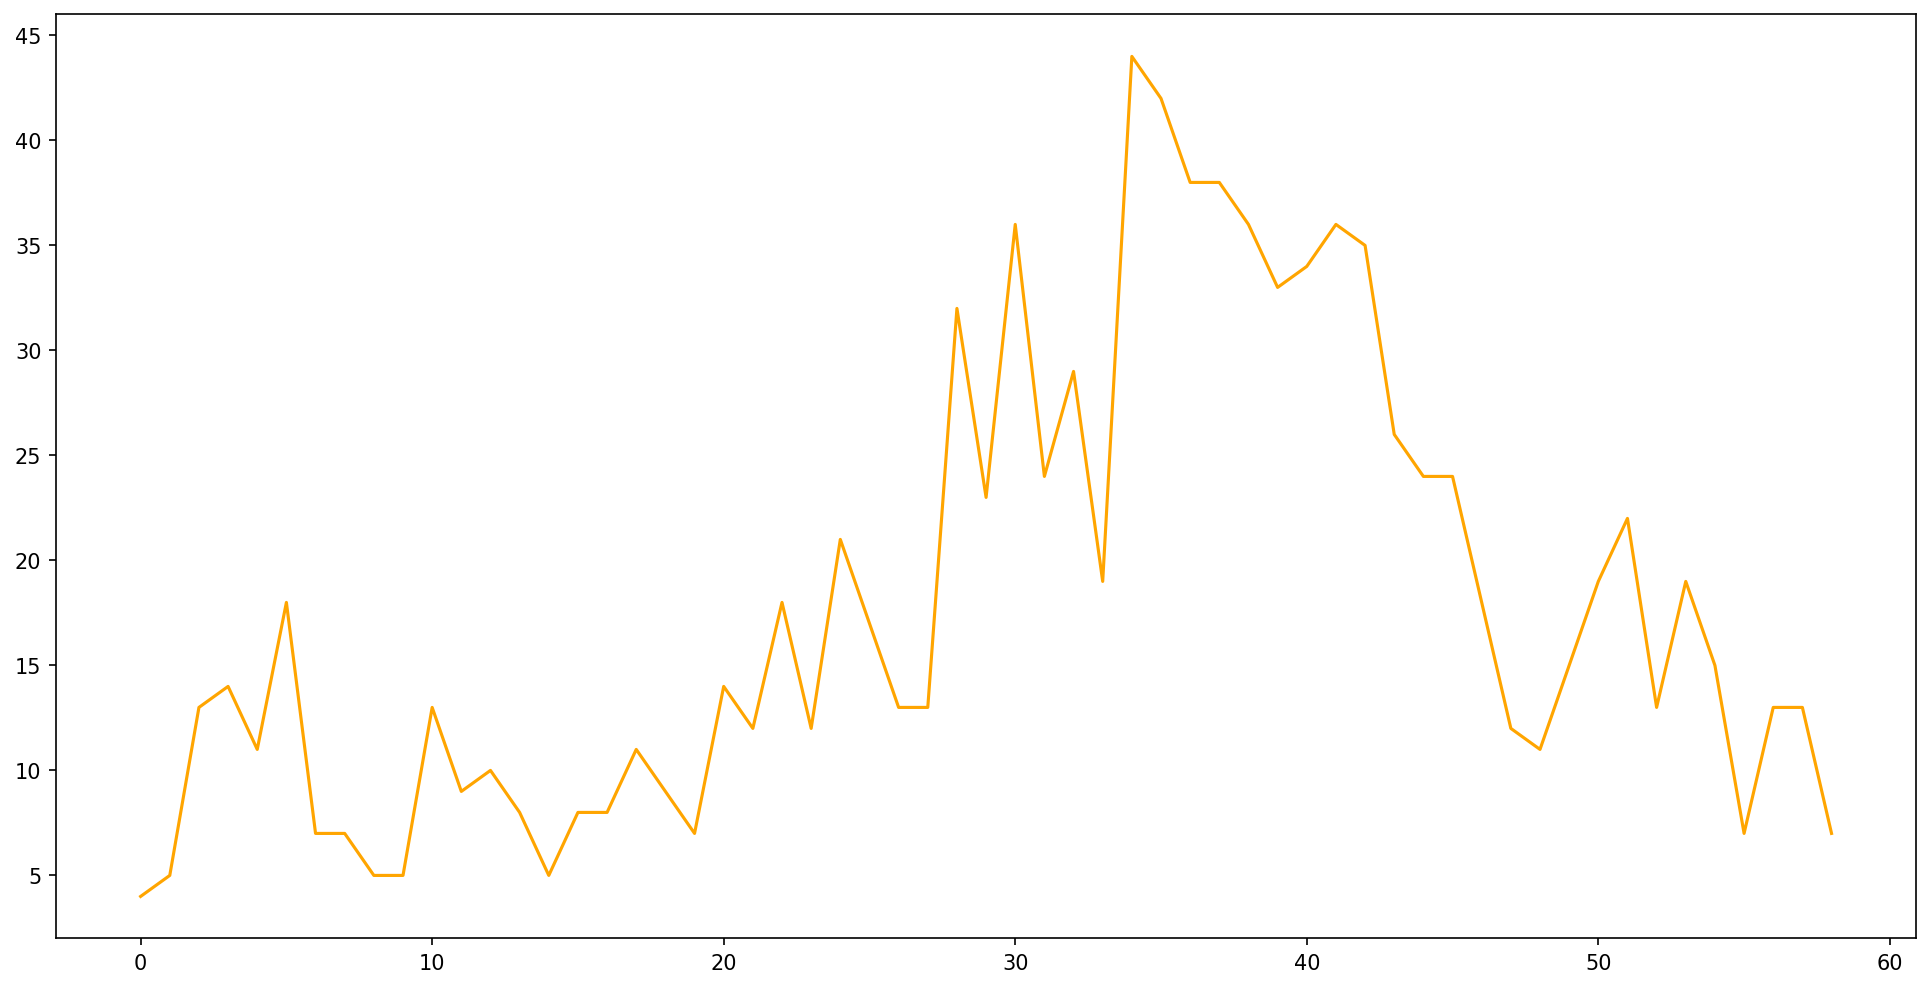

In [55]:
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen\graphNr0_attributNr0_20170603._component0_dbz25Interpol_1000.txt", dtype=int)

print(type(dataFromTxt))

df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'+str(0)])

print(df.head(10))

plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['NrZhk'+str(0)].plot(label='NrZhk', color='orange')

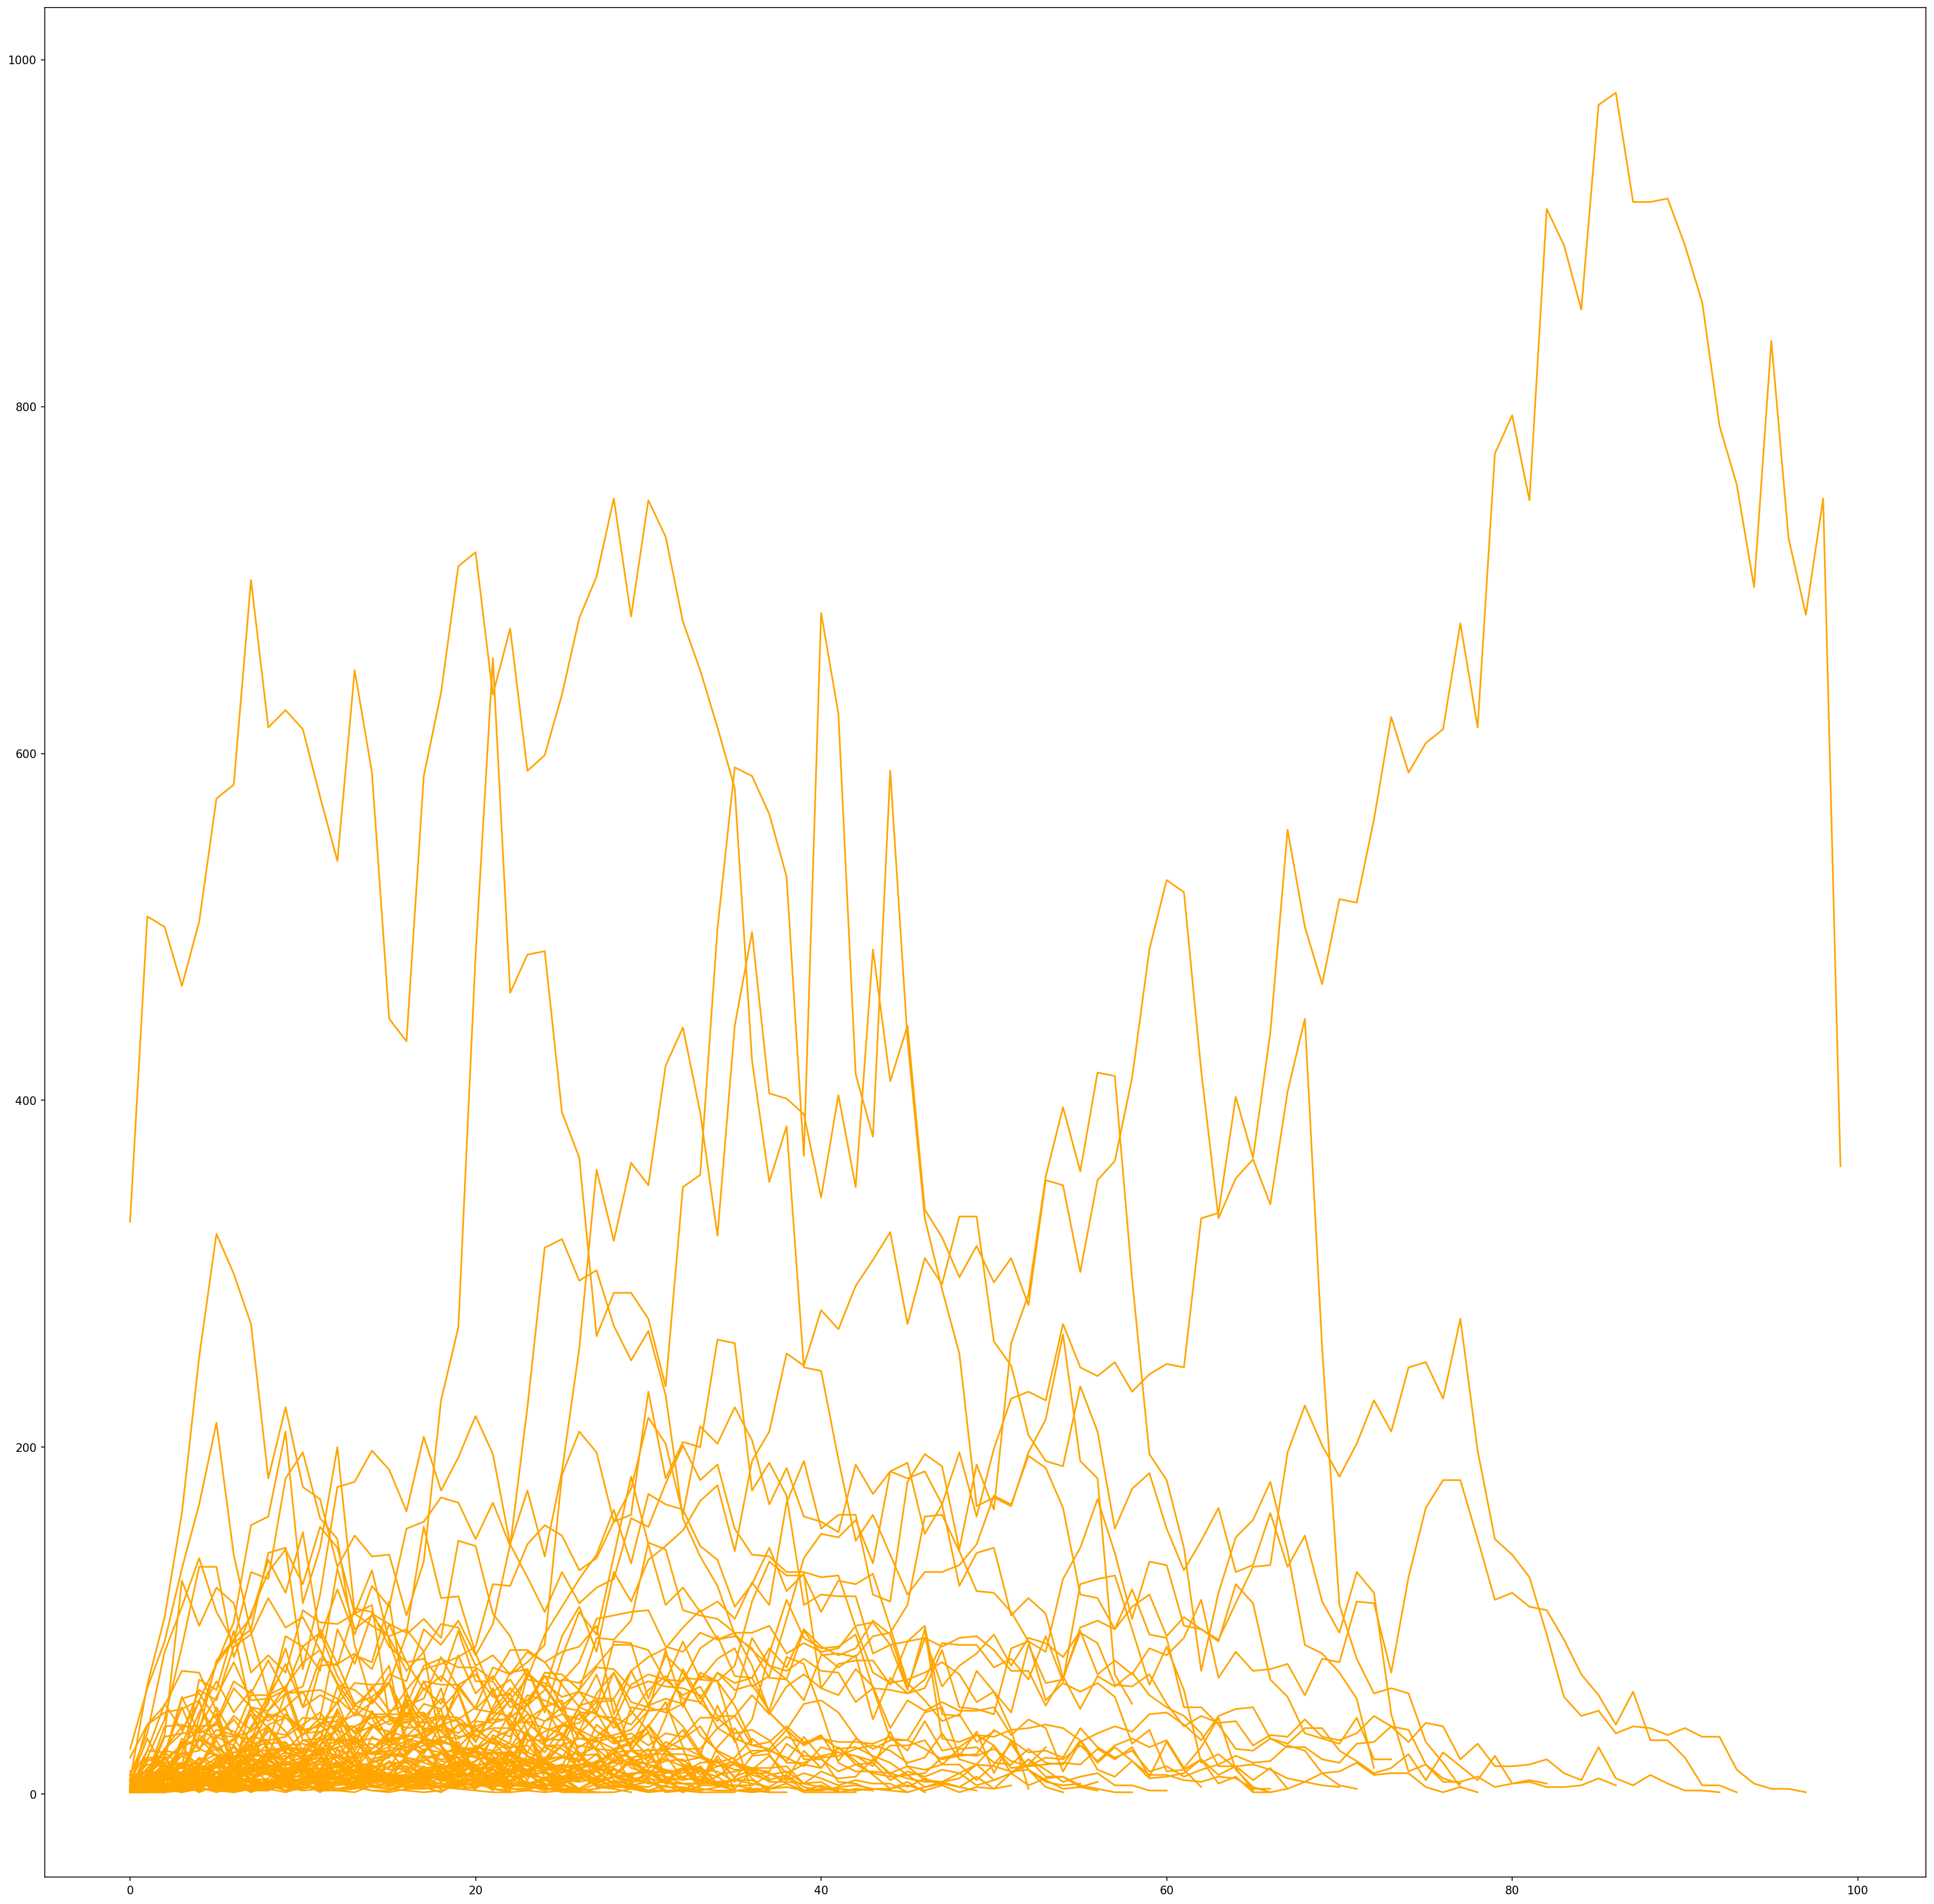

In [81]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
i = 0
plt.figure(figsize=(30, 30), dpi=150)
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    #if os.path.isfile(f):
        #print(f)
    #else:
     #   print("keine Dateien mehr vorhanden")
      #  break
    if "attributNr0" in str(f):
        dataFromTxt = np.loadtxt(f, dtype=int)
        #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
        if dataFromTxt.size <= 100 and i%2!=0:
            df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
            df['NrZhk'].plot(label='NrZhk', color='orange')
        i += 1
        
#plt.figure(figsize=(16, 8), dpi=150)
#for z in range(i):
#    df['NrZhk'+str(z)].plot(label='NrZhk', color='orange')
        